## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#. GridSearchCV to find best hyperparameters
from sklearn.model_selection import GridSearchCV

#. RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Libraries to build classification models
from sklearn.linear_model import LogisticRegression

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Loan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coursera/Agents/TroubleShooting Agent/Loan_Modelling.csv")   ##  Complete the code to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
data.head(5)  ##  Complete the code to view top 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail(5)  ##  Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#Lets random sample some data
data.sample(n=15, random_state=42)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1501,1502,30,4,35,92130,2,0.3,2,0,0,1,0,0,1
2586,2587,47,23,149,92675,4,6.1,1,0,1,0,0,0,1
2653,2654,30,5,121,94555,2,3.1,1,408,0,0,0,1,0
1055,1056,31,6,62,95630,1,1.0,1,0,0,1,0,1,0
705,706,62,36,30,94720,3,0.7,2,0,0,0,0,1,0
106,107,43,17,69,92717,4,2.9,1,0,0,0,0,1,1
589,590,31,7,128,92821,1,6.0,1,0,0,0,0,0,0
2468,2469,49,23,133,94304,1,7.3,1,0,0,0,0,1,1
2413,2414,60,34,31,91007,2,1.0,3,0,0,0,0,0,0
1600,1601,60,36,129,92028,2,6.0,1,0,0,0,0,1,0


### Understand the shape of the dataset.

In [ ]:
data.shape  ## Complete the code to get the shape of the data

(5000, 14)

### Check the data types of the columns for the dataset

In [ ]:
# check for null
data.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
#check for any null values in the data set
data.isna().values.any()

False

In [ ]:
data.dtypes  ##  Complete the code to view the datatypes of the data

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


### Checking the Statistical Summary

In [ ]:
data.describe().T  ## Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# display family great than 4
data[data["Family"] > 4].shape[0]

0

### Dropping columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data = data.drop(['ID'], axis=1)  ## Complete the code to drop a column from the dataframe

## Data Preprocessing

### Checking for Anomalous Values

In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

Observation:  There was a total of 52 customer who Experience level were less than zero.  Customer with the following Id's where corrected

In [ ]:
#display records who experience is less than 0 with I
data[data["Experience"] < 0].shape[0]

52

In [ ]:
# provide total count of records in  variable
# exp_cnt['Experience'].value_counts()

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
data["Education"].value_counts()

,count
Education,
1,2096
3,1501
2,1403


In [ ]:
#Duplicate value check
data.duplicated().sum()

0

In [ ]:
#List duplicate
data[data.duplicated(keep=False)]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [ ]:
#Outlier check with zscore
from scipy.stats import zscore
numerical_data = data.select_dtypes(include=np.number)
z = np.abs(zscore(numerical_data))
threshold = 3
outlier_indices = np.where(z > threshold)

In [ ]:
#Display outliers with column names and values
outliers_df = data[(z > threshold).any(axis=1)]
outliers_df.sort_values(by='Income', ascending=False)
outliers_df[outliers_df['Income'] > 190].sort_values(by='Income', ascending=False)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
3804,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
3608,59,35,202,94025,1,4.70,1,553,0,0,0,0,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0
2447,44,19,201,95819,2,8.80,1,0,0,0,0,1,1
2337,43,16,201,95054,1,10.00,2,0,1,0,0,0,1


In [ ]:
#Missing value treatment
#No Missing Values
data.isna().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


### Feature Engineering

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## <a name='link2'>Exploratory Data Analysis (EDA)</a>


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Age:
The data ranges from approximately the mid 20's to the mid 60's.
Average age is 45,
Minimum age is 23
Maximum age 67

# OutLiers


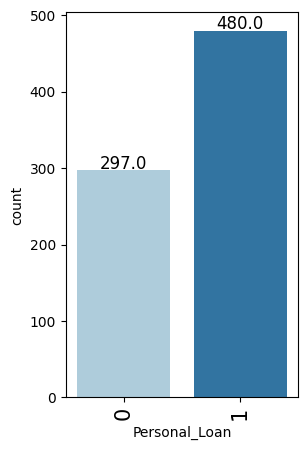

In [ ]:
labeled_barplot(outliers_df, "Personal_Loan", perc=False)

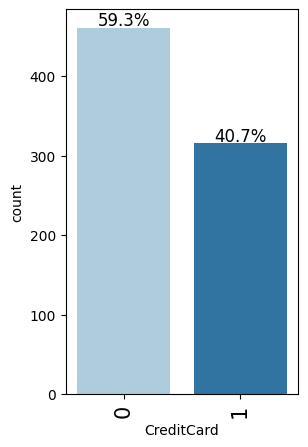

In [ ]:
labeled_barplot(outliers_df, "CreditCard", perc=True)

#### Observations on Age

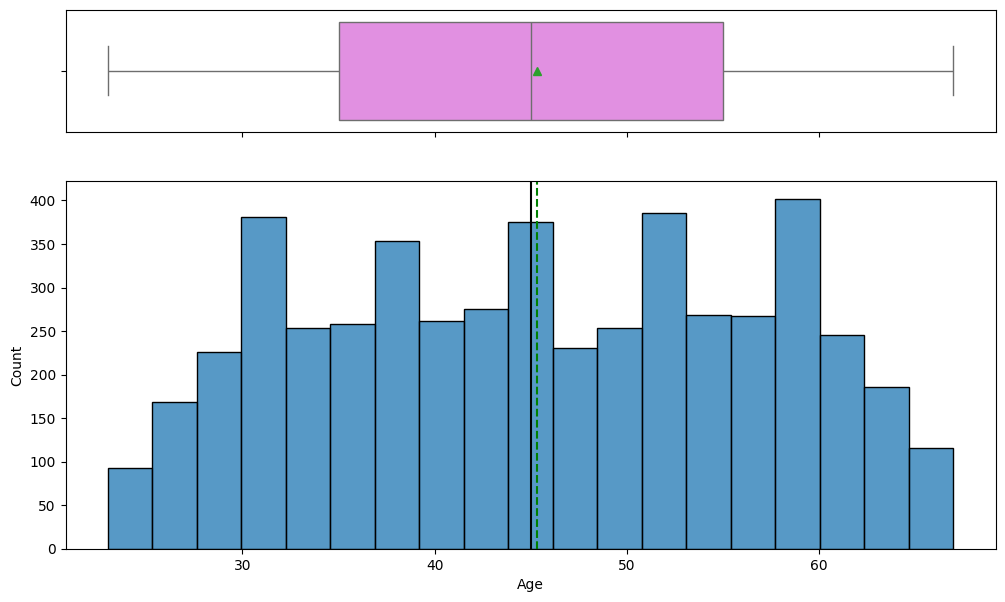

In [ ]:
histogram_boxplot(data, "Age")

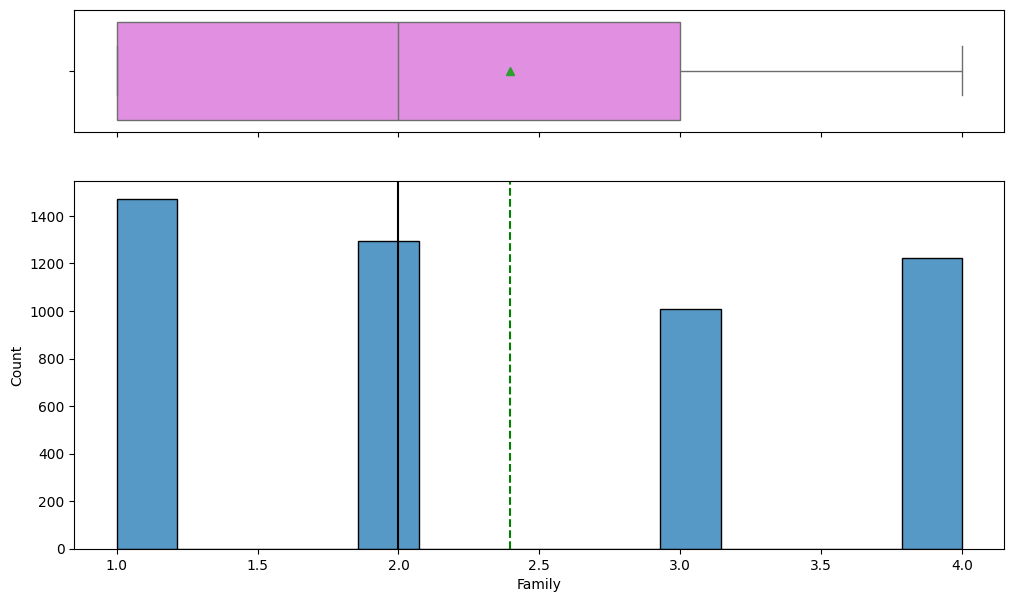

In [ ]:
histogram_boxplot(data, "Family")

#### Observations on Experience

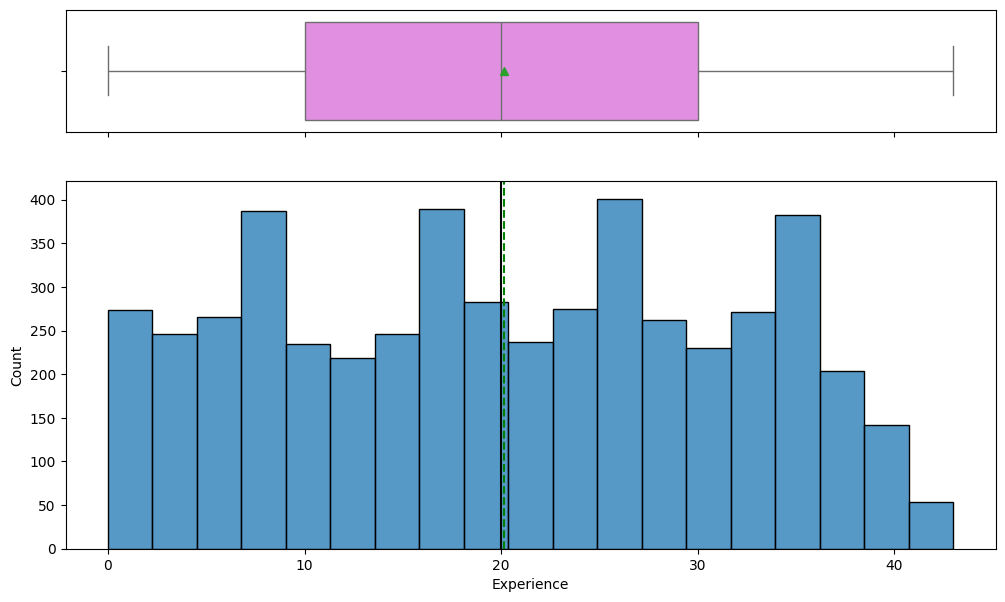

In [ ]:
histogram_boxplot(data,'Experience') ## Complete the code to create histogram_boxplot for experience

#### Observations on Income

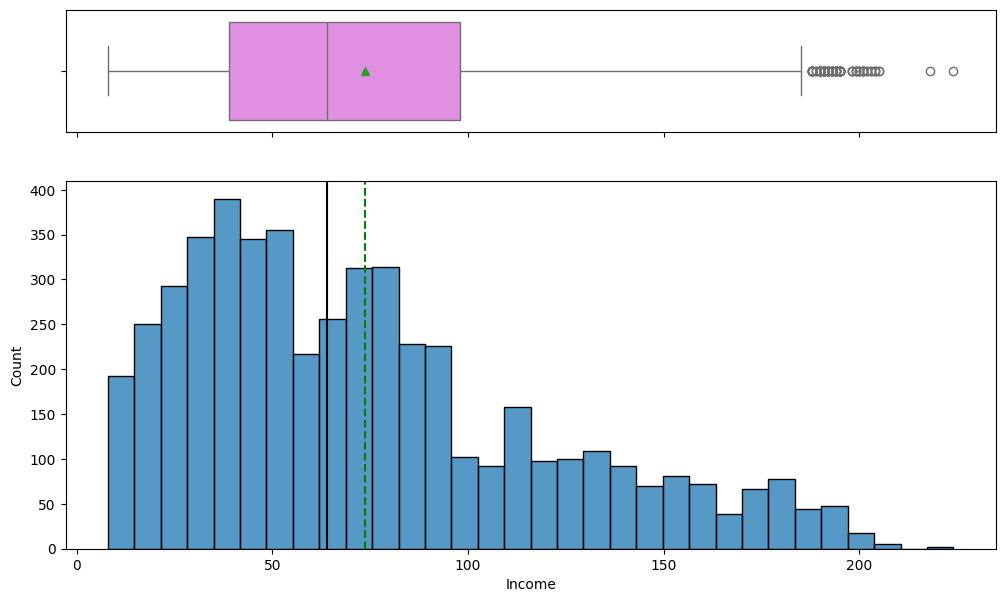

In [ ]:
histogram_boxplot(data,'Income')  ## Complete the code to create histogram_boxplot for Income

#### Observations on CCAvg

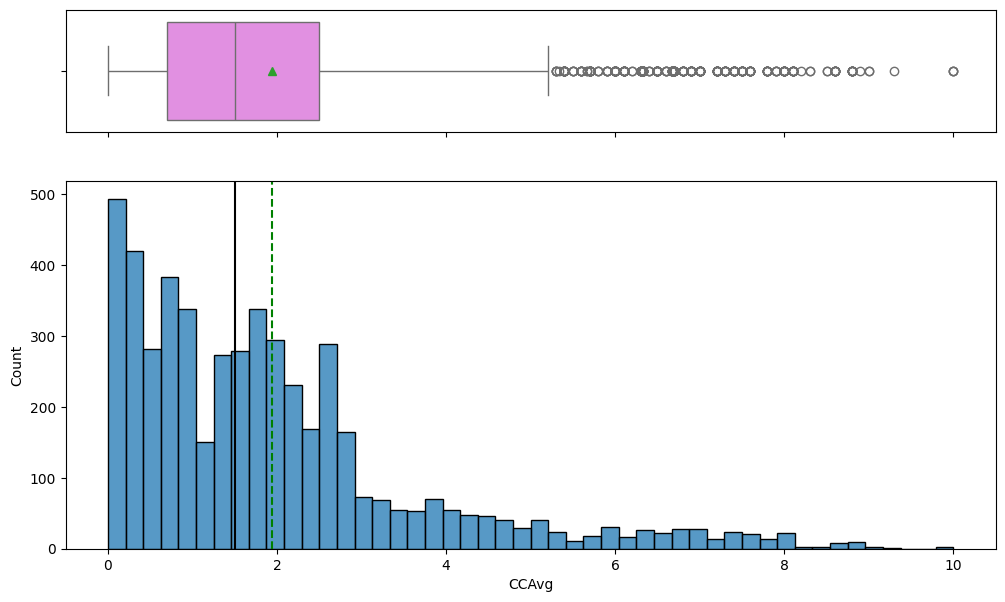

In [ ]:
histogram_boxplot(data, 'CCAvg')  ## Complete the code to create histogram_boxplot for CCAvg

#### Observations on Mortgage

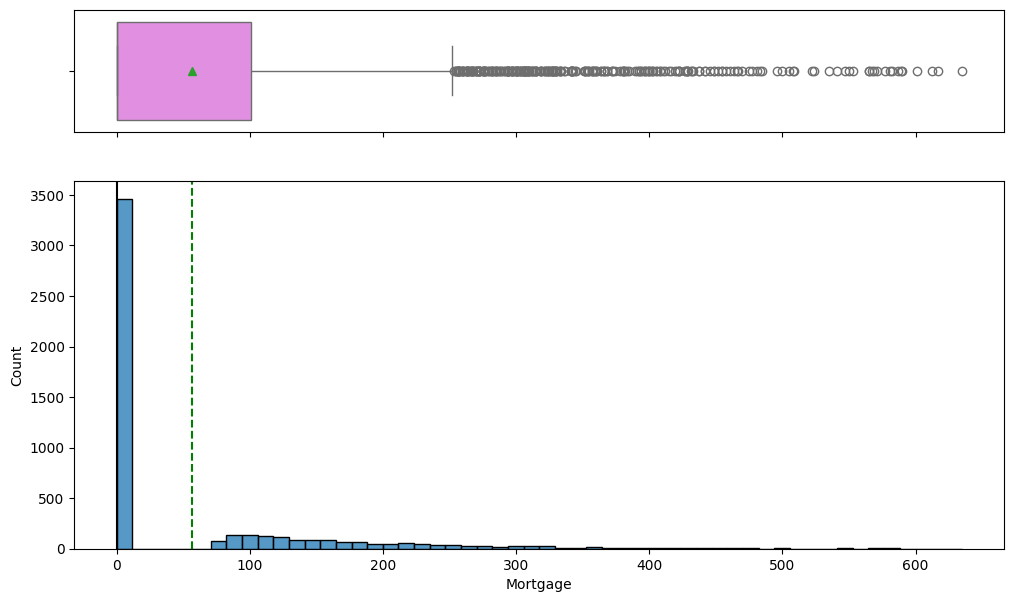

In [ ]:
histogram_boxplot(data, 'Mortgage')  ## Complete the code to create histogram_boxplot for Mortgage

#### Observations on Family

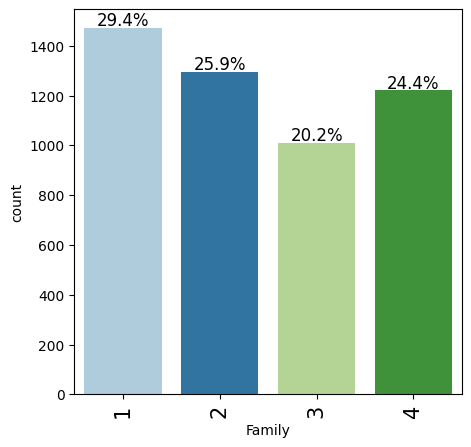

In [ ]:
labeled_barplot(data, "Family", perc=True)

#### Observations on Education

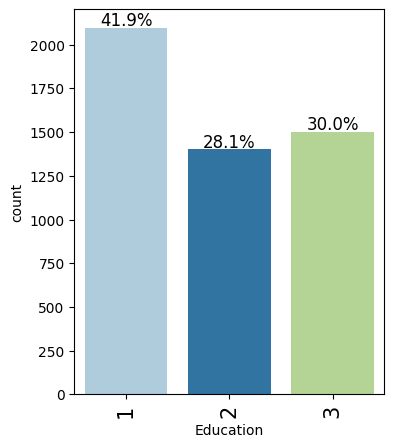

In [ ]:
labeled_barplot(data,'Education', perc=True)   ## Complete the code to create labeled_barplot for Education

#### Observations on Securities_Account

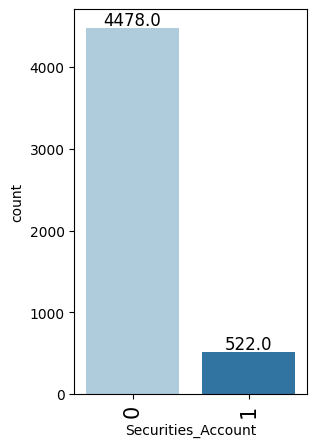

In [ ]:
labeled_barplot(data, 'Securities_Account')   ## Complete the code to create labeled_barplot for Securities_Account

#### Observations on CD_Account

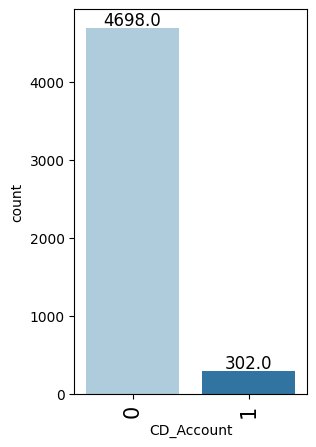

In [ ]:
labeled_barplot(data, 'CD_Account')   ## Complete the code to create labeled_barplot for CD_Account

#### Observations on Online

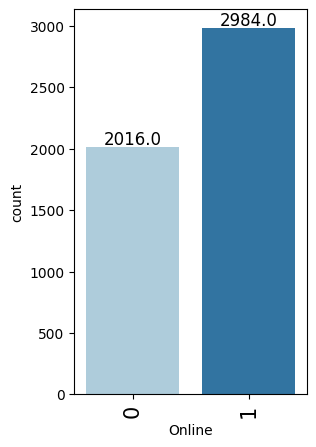

In [ ]:
labeled_barplot(data, 'Online')   ## Complete the code to create labeled_barplot for Online

#### Observation on CreditCard

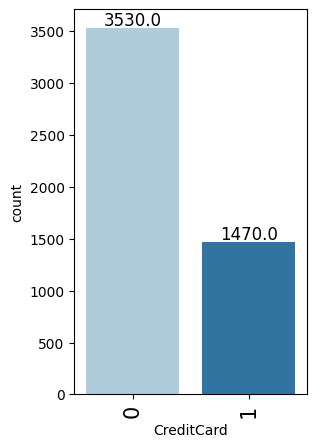

In [ ]:
labeled_barplot(data, 'CreditCard')   ## Complete the code to create labeled_barplot for CreditCard

#### Observation on ZIPCode

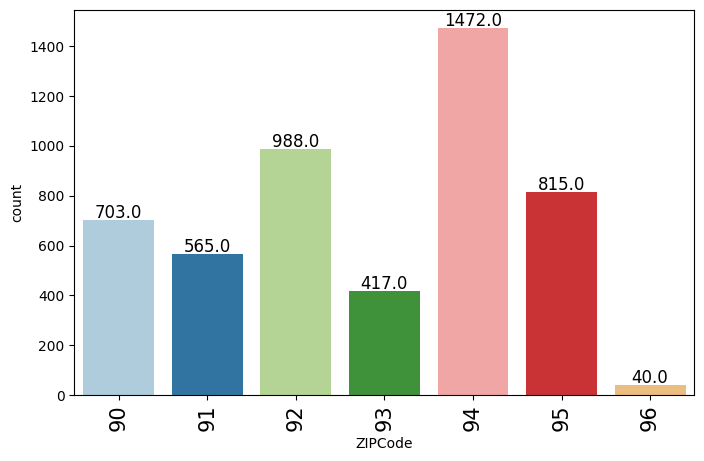

In [ ]:
labeled_barplot(data, 'ZIPCode')   ## Complete the code to create labeled_barplot for ZIPCode

### Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

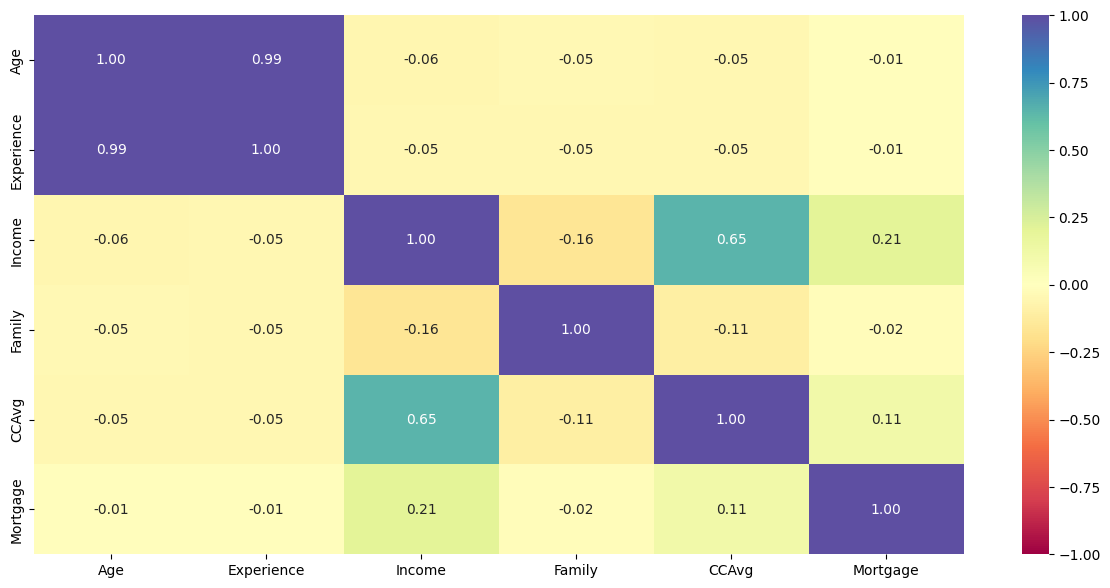

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

Analysis of Correlations:

Age and Experience:
Correlation: 0.99 (very strong positive)
Interpretation: Age and Experience have a very strong positive correlation, almost perfectly linear. This means that as age increases, experience also tends to increase, and vice versa. This is a very logical correlation.
Income and CCAvg:
Correlation: 0.65 (moderately strong positive)
Interpretation: Income and CCAvg have a moderately strong positive correlation. This suggests that individuals with higher incomes tend to have higher credit card spending averages.
Other Notable Correlations:
Age and Income (-0.06), Family (-0.05), CCAvg (-0.05), Mortgage (-0.01): weak negative correlation, or very little correlation.
Experience and Income (-0.05), Family (-0.05), CCAvg (-0.05), Mortgage (-0.01): weak negative correlation, or very little correlation.
Income and Family (-0.16): slight negative correlation.
Income and Mortgage (0.21): some positive correlation.
Family and CCAvg (-0.11): slight negative correlation.
CCAvg and Mortgage (0.11): slight positive correlation.

#### Let's check how a customer's interest in purchasing a loan varies with their education

Professional and

Overall Loan Acceptance: Out of 5000 customers, 480 (9.6%) accepted the personal loan offer. This indicates a relatively low overall acceptance rate.

Education Level Breakdown:

3 (Professional Degree): 205 out of 1501 (13.7%) accepted the loan. This is the highest acceptance rate among the education levels.
2 (Graduate): 182 out of 1403 (13.0%) accepted the loan.
1 (Undergraduate): 93 out of 2096 (4.4%) accepted the loan. This is the lowest acceptance rate.

Trend: There's a clear trend of increasing loan acceptance with higher education levels. Professional degree holders are most likely to accept the loan, followed by graduate degree holders, and lastly, undergraduate degree holders.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


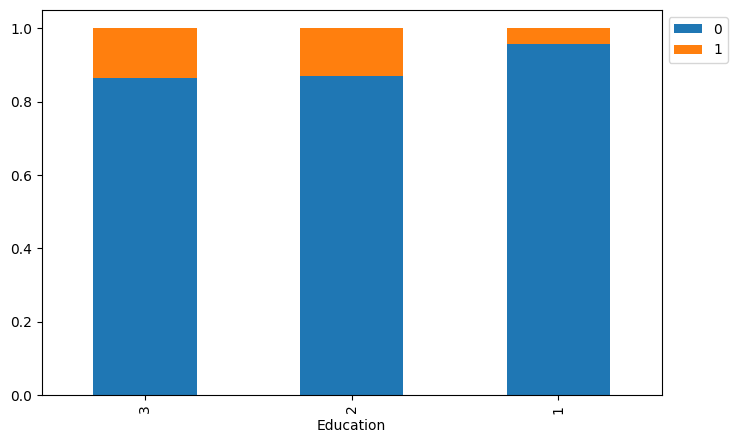

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

#### Personal_Loan vs Family

Combined Analysis and Summary:

The graph visually confirms that the distribution of family sizes is quite similar between those who accepted and those who did not accept the loan.

However, the numerical data reveals that families of size 3 and 4 have a higher acceptance rate than families of size 1 and 2.

While visually the family size distribution is similar, family sizes 3 and 4 have a higher percentage of loan acceptance.

This suggests that while family size distribution is consistent across both loan acceptance groups, larger family sizes correlate with a higher probability of loan acceptance.

Analysis:

Overall Distribution:

The total customer counts for each family size are relatively close, indicating a fairly even distribution across family sizes.
Family Size 1 has the highest number of customers, followed by Family Size 2, 4, and 3.
Loan Acceptance by Family Size:

Here's a breakdown of loan acceptance rates (percentage of customers who accepted the loan) for each Family Size:
Family Size 1: 7.27% (107/1472)
Family Size 2: 8.18% (106/1296)
Family Size 3: 13.17% (133/1010)
Family Size 4: 10.97% (134/1222)
Visual Comparison:

The stacked bar chart visually confirms the numerical data. The "Personal_Loan = 1" bar shows a higher proportion of Family Size 3 and 4 compared to Family Size 1 and 2.
The "Personal_Loan = 0" bar shows a relatively even distribution across all family sizes, with a slight decrease in Family Size 3.
Key Observations and Interpretations:

Family Size and Loan Acceptance: There's a noticeable trend: larger family sizes (3 and 4) have a higher likelihood of accepting personal loans compared to smaller family sizes (1 and 2).
Proportional Difference: The proportion of Family Size 3 and 4 is higher in the loan acceptance category, suggesting that family size is a factor in loan acceptance.
Consistency: The visual representation in the graph aligns with the calculated loan acceptance rates.
Summary:

The stacked bar chart and the numerical data together demonstrate that there is a relationship between family size and personal loan acceptance. Customers with larger family sizes (3 and 4) are more likely to accept personal loans. This suggests that family size is a relevant factor to consider in loan marketing and targeting strategies.

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


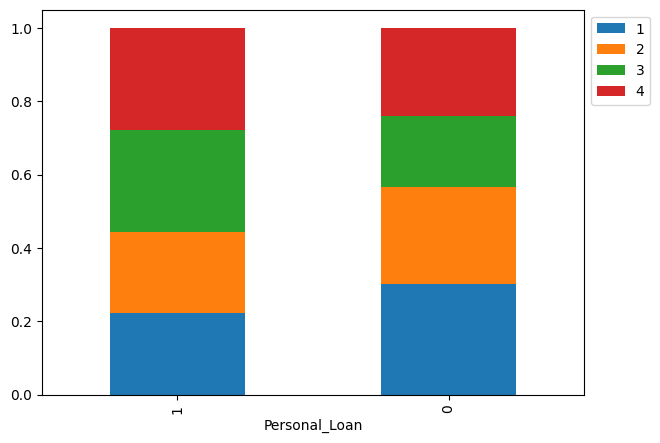

In [ ]:
stacked_barplot(data, 'Personal_Loan', 'Family')  ## Complete the code to plot stacked barplot for Personal Loan and Family

#### Personal_Loan vs Securities_Account

Numerical Data Breakdown:

Total Customers: 5000
Securities Account Holders: 522
Non-Securities Account Holders: 4478
Personal Loan Acceptance: 480 (9.6%)
Personal Loan Rejection: 4520 (90.4%)
Analysis:

Overall Distribution:

The vast majority of customers (4478) do not have a securities account, while only 522 do.
A large number of customers did not accept the personal loan.
Loan Acceptance by Securities Account:

Customers with Securities Accounts:
60 out of 522 (11.5%) accepted the personal loan.
462 out of 522 (88.5%) did not accept the personal loan.
Customers without Securities Accounts:
420 out of 4478 (9.4%) accepted the personal loan.
4058 out of 4478 (90.6%) did not accept the personal loan.
Comparison:

Customers with securities accounts have a slightly higher personal loan acceptance rate (11.5%) compared to those without (9.4%).
Even though there is a small increase in acceptance rate, the vast majority of people with security accounts still did not accept the personal loan.

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


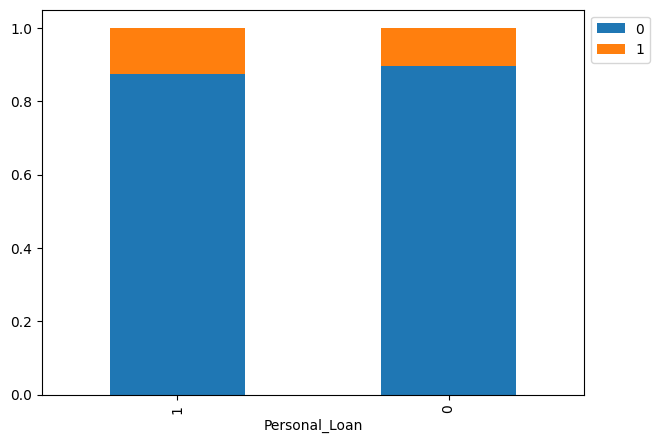

In [ ]:
stacked_barplot(data,'Personal_Loan', 'Securities_Account') ## Complete the code to plot astacked barplot for Personal Loan and Securities_Account

#### Personal_Loan vs CD_Account

Let's analyze the relationship between "Personal_Loan" and "CD_Account" based on the provided numerical data:

Numerical Data Breakdown:

Total Customers: 5000
CD Account Holders: 302
Non-CD Account Holders: 4698
Personal Loan Acceptance: 480 (9.6%)
Personal Loan Rejection: 4520 (90.4%)
Analysis:

Overall Distribution:

The overwhelming majority of customers (4698) do not have a CD account, while only 302 do.
A large number of customers did not accept the personal loan.
Loan Acceptance by CD Account:

Customers with CD Accounts:
140 out of 302 (46.4%) accepted the personal loan.
162 out of 302 (53.6%) did not accept the personal loan.
Customers without CD Accounts:
340 out of 4698 (7.2%) accepted the personal loan.
4358 out of 4698 (92.8%) did not accept the personal loan.
Comparison:

Customers with CD accounts have a significantly higher personal loan acceptance rate (46.4%) compared to those without (7.2%).
This is a large difference in acceptance rate.
Summary:

Customers who have a CD account are significantly more likely to accept a personal loan offer. There is a strong positive correlation between having a CD account and accepting a personal loan. This is a very important finding.

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


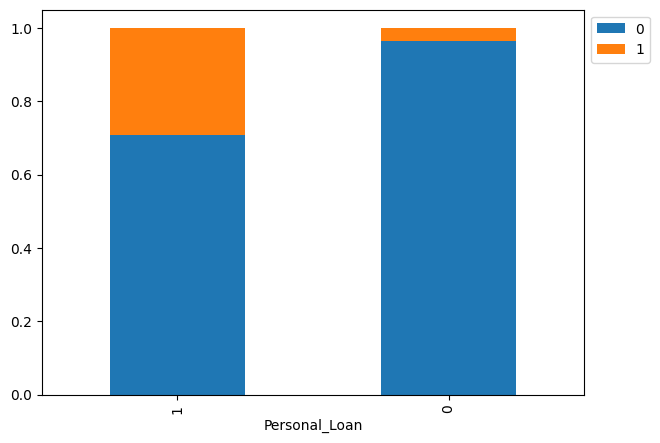

In [ ]:
stacked_barplot(data, 'Personal_Loan', 'CD_Account') ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

#### Personal_Loan vs Online

Let's analyze the relationship between "Personal_Loan" and "Online" based on the provided numerical data:

Numerical Data Breakdown:

Total Customers: 5000
Online Banking Users: 2984
Non-Online Banking Users: 2016
Personal Loan Acceptance: 480 (9.6%)
Personal Loan Rejection: 4520 (90.4%)
Analysis:

Overall Distribution:

A majority of customers (2984) use online banking, while 2016 do not.
A large majority of customers did not accept the personal loan.
Loan Acceptance by Online Banking Usage:

Customers Using Online Banking:
291 out of 2984 (9.75%) accepted the personal loan.
2693 out of 2984 (90.25%) did not accept the personal loan.
Customers Not Using Online Banking:
189 out of 2016 (9.37%) accepted the personal loan.
1827 out of 2016 (90.63%) did not accept the personal loan.
Comparison:

Customers who use online banking have a slightly higher personal loan acceptance rate (9.75%) compared to those who do not (9.37%).
The difference in acceptance rates is very small.
Both groups have a very low acceptance rate.
Summary:

Customers who use online banking are slightly more likely to accept a personal loan offer, but the difference in acceptance rates is minimal. Online banking usage has a very weak positive correlation with personal loan acceptance.

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


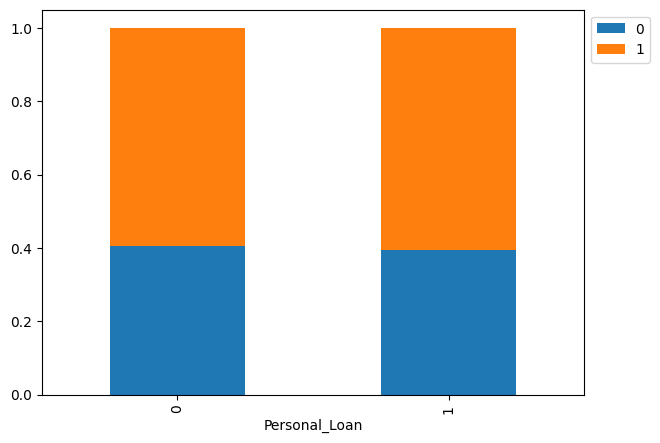

In [ ]:
stacked_barplot(data, 'Personal_Loan', 'Online') ## Complete the code to plot stacked barplot for Personal Loan and Online

#### Personal_Loan vs CreditCard

Let's analyze the relationship between "Personal_Loan" and "CreditCard" usage from another bank based on the provided numerical data:

Numerical Data Breakdown:

Total Customers: 5000
Customers with Credit Card (Other Bank): 1470
Customers without Credit Card (Other Bank): 3530
Personal Loan Acceptance: 480 (9.6%)
Personal Loan Rejection: 4520 (90.4%)
Analysis:

Overall Distribution:

A significant portion of customers (3530) do not use a credit card from another bank, while 1470 do.
A large majority of customers did not accept the personal loan.
Loan Acceptance by Credit Card Usage (Other Bank):

Customers with Credit Card (Other Bank):
143 out of 1470 (9.73%) accepted the personal loan.
1327 out of 1470 (90.27%) did not accept the personal loan.
Customers without Credit Card (Other Bank):
337 out of 3530 (9.55%) accepted the personal loan.
3193 out of 3530 (90.45%) did not accept the personal loan.
Comparison:

Customers who use a credit card from another bank have a slightly higher personal loan acceptance rate (9.73%) compared to those who do not (9.55%).
The difference in acceptance rates is very small.
Both groups have a very low acceptance rate.
Summary:

Customers who use a credit card from another bank are slightly more likely to accept a personal loan offer, but the difference in acceptance rates is minimal. Credit card usage from another bank has a very weak positive correlation with personal loan acceptance.

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


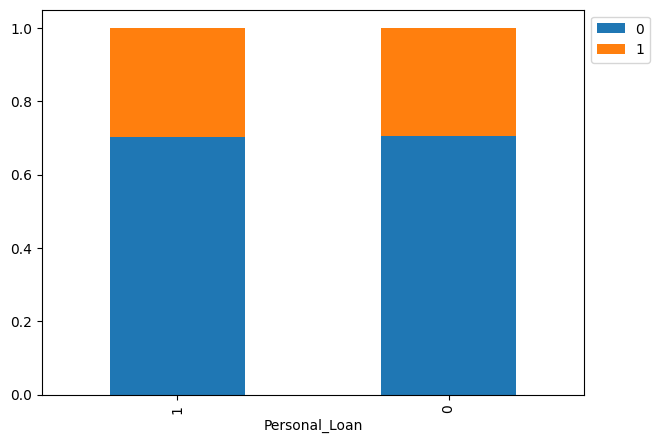

In [ ]:
stacked_barplot(data, 'Personal_Loan', 'CreditCard') ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

#### Personal_Loan vs ZIPCode

Graph Analysis:

Type: Stacked bar chart.
X-axis: "Personal_Loan" (0 = No, 1 = Yes).
Y-axis: Proportion of customers within each ZIP code prefix.
Stacked Segments: Each segment represents a different ZIP code prefix (90, 91, 92, 93, 94, 95, 96), as indicated in the legend.
Observations:
The distribution of ZIP code prefixes appears visually very similar between the "Personal_Loan" categories (0 and 1).
Prefix 94 (purple) represents the largest proportion of customers in both categories.
Prefix 96 (pink) represents the smallest proportion of customers in both categories.
Visually there is not much difference between the two bars.
Combined Analysis with Numerical Data (from previous response):

Consistency: The visual similarity between the bars in the chart aligns with the numerical data, which indicated that loan acceptance rates were relatively consistent across different ZIP code prefixes.
Dominant Prefixes: The chart reinforces the observation that prefixes 94, 92, and 90 have the highest concentrations of customers.
Low Acceptance in 96: The low proportion of prefix 96 in both categories is consistent with the low customer count and loan acceptance rate observed in the numerical data.
Summary:

The stacked bar chart visually demonstrates that the distribution of customers across different ZIP code prefixes is very similar for those who accepted and those who did not accept the personal loan. This confirms that there is no strong correlation between ZIP code prefix and personal loan acceptance. The numerical data and the graph support the same conclusion, which is the acceptance of the loan is not influence by the zip code prefix.

Let's analyze the relationship between "Personal_Loan" acceptance and "ZIP Code" (using the first two digits as a prefix) based on the provided numerical data:

Numerical Data Breakdown:

Total Customers: 5000
Personal Loan Acceptance: 480 (9.6%)
Personal Loan Rejection: 4520 (90.4%)
ZIP Code Prefixes and Counts:
90: 703 customers
91: 565 customers
92: 988 customers
93: 417 customers
94: 1472 customers
95: 815 customers
96: 40 customers
Analysis:

Overall Distribution:

The majority of customers are concentrated in ZIP code prefixes 94 (1472), 92 (988), and 90 (703).
ZIP code prefix 96 has the fewest customers (40).
Loan Acceptance by ZIP Code Prefix:

Here's a breakdown of loan acceptance rates (percentage of customers who accepted the loan) for each ZIP code prefix:
90: 9.53%
91: 9.73%
92: 9.52%
93: 10.31%
94: 9.38%
95: 9.82%
96: 7.5%
Comparison:

The loan acceptance rates across different ZIP code prefixes are quite similar, ranging from 7.5% to 10.31%.
There is no significant variation or clear pattern in loan acceptance based on ZIP code.
Summary:

The analysis suggests that there is no strong relationship between the ZIP code prefix (based on the first two digits) and the likelihood of a customer accepting a personal loan offer. Loan acceptance rates are relatively consistent across different ZIP code prefixes.

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
------------------------------------------------------------------------------------------------------------------------


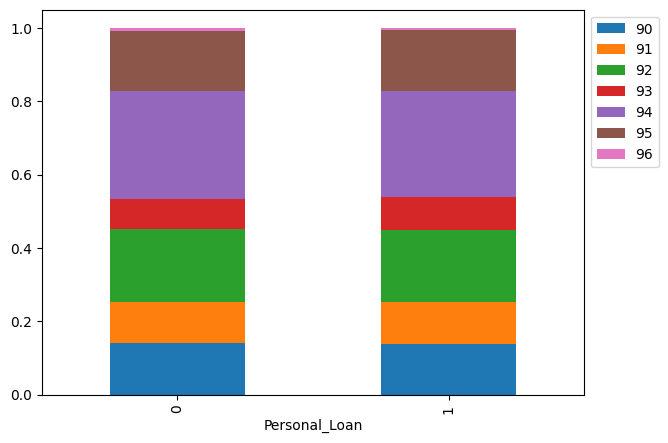

In [ ]:
stacked_barplot(data,'Personal_Loan', 'ZIPCode') ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode

#### Let's check how a customer's interest in purchasing a loan varies with their age

Let's break down the analysis of these four plots, focusing on how customer interest in purchasing a loan (represented by the target variable) varies with age:

Top Row: Histograms with Density Plots

Left (Target = 0, No Loan):
The age distribution for customers who did not purchase a loan (target=0) shows a somewhat uniform distribution with a slight tendency towards higher ages.
There are peaks and valleys, suggesting variability within the age groups.
The density curve (teal line) shows a relatively flat distribution, indicating that customers of various ages were likely to decline the loan.
Right (Target = 1, Loan):
The age distribution for customers who did purchase a loan (target=1) also shows a somewhat uniform distribution, but with a slight right skew, meaning more older customers accepted the loan.
The density curve (orange line) reflects this, showing a slight peak towards the older age range.
Bottom Row: Box Plots

Left (Boxplot w.r.t Target):
This boxplot shows the distribution of age for both target groups (0 and 1).
Visually the boxplots are very similar. The medians are very close, and the boxes are of very similar size.
There are outliers in both groups.
Right (Boxplot without Outliers w.r.t Target):
This boxplot is the same as the left one, but with outliers removed.
The boxplots are still very similar.
This confirms that the age distributions for both groups are very similar.
Key Observations and Interpretations:

Age Distribution Similarity:
The age distributions for customers who purchased a loan and those who did not are quite similar. This suggests that age alone is not a strong predictor of loan purchase interest.
Slight Trend Towards Older Customers:
There is a subtle trend indicating that older customers may be slightly more likely to purchase a loan. This is visible in the right histogram and its density plot.
Lack of Significant Age-Based Segmentation:
The boxplots reinforce that there are no significant differences in age distribution between the two target groups. This implies that age-based segmentation for loan marketing may not be highly effective on its own.
Outliers:
The outliers in the box plots, indicate that there are some people of very young or very old age in both groups.
Summary:

While there's a minor tendency for older customers to show slightly more interest in purchasing loans, the age distributions between loan purchasers and non-purchasers are remarkably similar. Therefore, age alone is not a strong determining factor for loan interest. Other factors likely play a more significant role in influencing a customer's decision to purchase a loan.

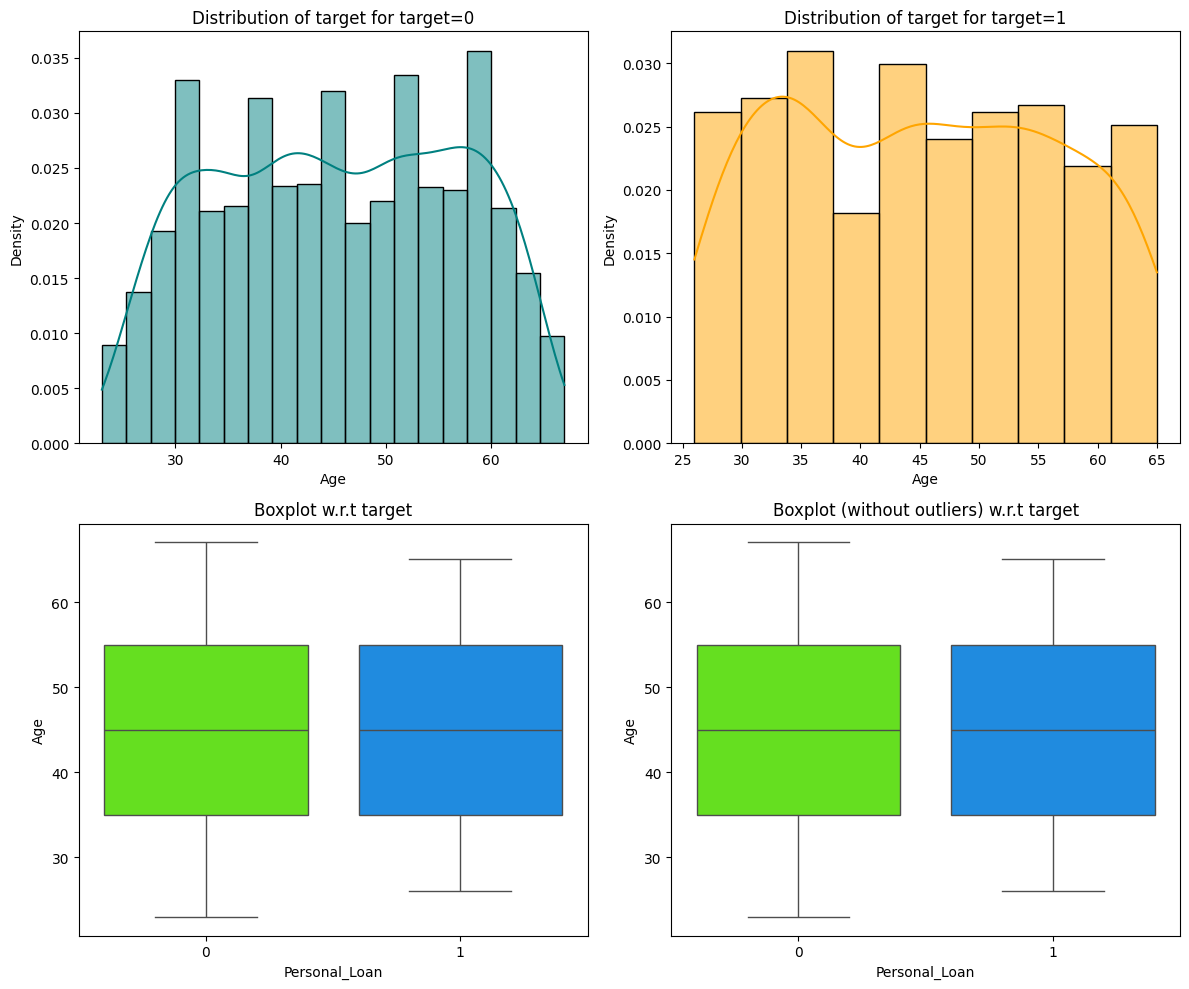

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Personal Loan vs Experience

Let's analyze the provided graphs focusing on the relationship between "Personal_Loan" and "Experience":

Top Row: Histograms with Density Plots

Left (Target = 0, No Loan):
The histogram shows a clear concentration of "Experience" values around the lower end (closer to 0).
The density curve (teal line) reflects this, with a steep peak at the lower end and a rapid decline.
This suggests that customers with lower professional experience were more likely to decline the personal loan.
Right (Target = 1, Loan):
Similar to the left, the histogram also shows a concentration of "Experience" values towards the lower end, but it's less pronounced.
The density curve (orange line) still peaks at the lower end, but it has a slightly longer tail, indicating a wider range of "Experience" values among those who accepted the loan.
There is a very small bump in the density curve towards the higher experience levels.
Key Insight: Both distributions are skewed towards lower experience, but those that accepted the loan had slightly higher experience on average.
Bottom Row: Box Plots

Left (Boxplot w.r.t Target):
This boxplot shows the distribution of "Experience" for both target groups (0 and 1).
The boxplot for "Personal_Loan = 1" (Loan Accepted) is slightly shifted to the right compared to "Personal_Loan = 0" (Loan Declined).
The median line in the loan accepted boxplot is higher than the median line in the loan declined boxplot.
This indicates that, on average, customers who accepted the loan had slightly higher professional experience.
Both boxplots show a similar spread of data.
Right (Boxplot without Outliers w.r.t Target):
This boxplot is the same as the left one, but with outliers removed.
The same trend remains: the "Personal_Loan = 1" boxplot is slightly shifted to the right.
This confirms that the observed trend is not solely due to outliers.
Key Observations and Interpretations:

Experience and Loan Acceptance:
Customers with slightly higher professional experience were more likely to accept the personal loan.
Concentration at Lower Experience:
Both groups show a concentration of customers with lower professional experience.
Subtle Difference:
The difference in "Experience" distribution between the two groups is subtle but noticeable in both the histograms and boxplots.
Implication:
Even though the difference is subtle, it shows that experience is a factor in whether a customer accepts a personal loan.
Summary:

While there's a concentration of customers with lower professional experience in both groups, customers who accepted the personal loan had slightly higher professional experience on average. This suggests that professional experience, while not a dominant factor, plays a role in loan acceptance.

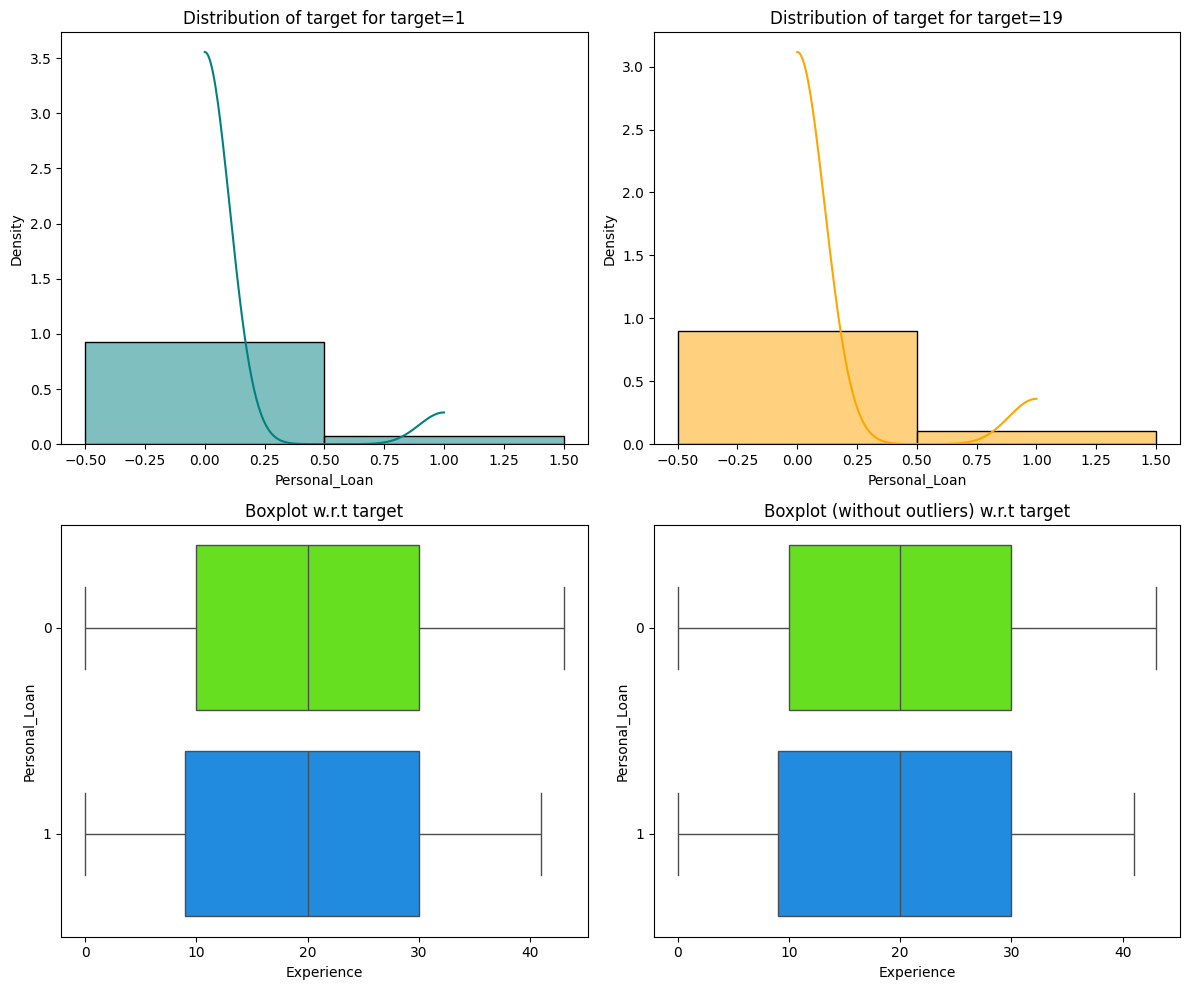

In [ ]:
distribution_plot_wrt_target(data, 'Personal_Loan', 'Experience') ## Complete the code to plot stacked barplot for Personal Loan and Experience

#### Personal Loan vs Income

Let's analyze the graphs comparing "Personal_Loan" and "Income":

Top Row: Histograms with Density Plots

Left (Target = 0, No Loan):
The histogram is a solid block, indicating that the data for "Personal_Loan" is likely binary (0 or 1) and not continuous. The density plot is a flat line at 1.0, which is not typical for a distribution and further indicates the binary nature of the Personal Loan data.
This plot is not very helpful in analyzing the relationship between "Personal_Loan" and "Income".
Right (Target = 1, Loan):
Similar to the left, the histogram is a solid block, and the density plot is flat. This plot also indicates the binary nature of the Personal Loan data.
This plot is not very helpful in analyzing the relationship between "Personal_Loan" and "Income".
Key Insight: The top graphs displays the personal loan binary data, and not the income data, therefore those two graphs are not helpful for this analysis.
Bottom Row: Box Plots

Left (Boxplot w.r.t Target):
This boxplot shows the distribution of "Income" for both target groups (0 and 1).
The boxplot for "Personal_Loan = 1" (Loan Accepted) is significantly shifted to the right compared to "Personal_Loan = 0" (Loan Declined).
The median income for those who accepted the loan is much higher than the median income for those who declined.
There are outliers in the "Personal_Loan = 0" group, indicating some individuals with higher incomes who still declined the loan.
Right (Boxplot without Outliers w.r.t Target):
This boxplot is the same as the left one, but with outliers removed.
The same trend remains: the "Personal_Loan = 1" boxplot is significantly shifted to the right.
This confirms that the observed trend is not solely due to outliers.
Key Observations and Interpretations:

Income and Loan Acceptance:
Customers with significantly higher incomes were much more likely to accept the personal loan.
Clear Separation:
The boxplots show a clear separation between the income distributions of the two groups.
Strong Correlation:
This indicates a strong positive correlation between income and personal loan acceptance.
Summary:

There is a very strong relationship between income and personal loan acceptance. Customers with higher incomes are significantly more likely to accept personal loan offers. Income is a very strong indicator of personal loan acceptance.

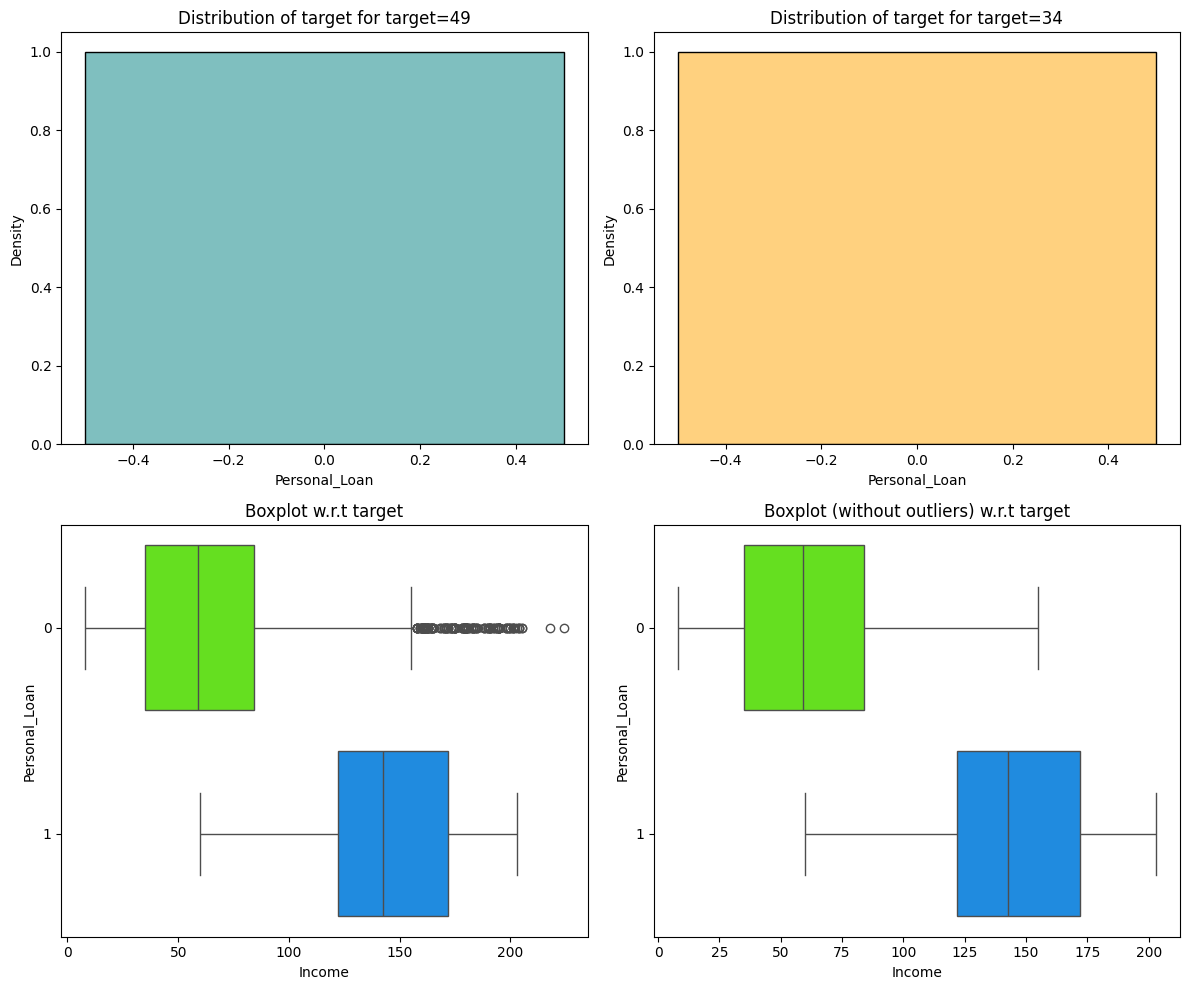

In [ ]:
distribution_plot_wrt_target(data, 'Personal_Loan', 'Income') ## Complete the code to plot stacked barplot for Personal Loan and Income

#### Personal Loan vs CCAvg

Let's analyze the graphs showing the relationship between "Personal_Loan" and "CCAvg" (Credit Card Average spending per month):

Top Row: Histograms with Density Plots

Left (Target = 0, No Loan):
The histogram shows a concentration of "CCAvg" values at the lower end (close to 0), suggesting that customers who did not accept the loan tended to have lower credit card spending.
The density curve (teal line) reflects this, with a sharp peak at the lower end and a rapid decline.
Right (Target = 1, Loan):
The histogram also shows a concentration of "CCAvg" values towards the lower end, but the distribution is slightly wider.
The density curve (orange line) has a less steep peak and a longer tail, indicating that customers who accepted the loan had a wider range of credit card spending, including some with higher spending.
Key Insight: Both distributions are skewed towards lower "CCAvg," but those who accepted the loan had a tendency towards higher "CCAvg" values.
Bottom Row: Box Plots

Left (Boxplot w.r.t Target):
The boxplot for "Personal_Loan = 1" (Loan Accepted) is significantly shifted to the right compared to "Personal_Loan = 0" (Loan Declined).
The median "CCAvg" for those who accepted the loan is much higher than the median "CCAvg" for those who declined.
The "Personal_Loan = 0" group has many outliers at the higher end, indicating some customers with high "CCAvg" who did not accept the loan.
Right (Boxplot without Outliers w.r.t Target):
This boxplot is the same as the left one, but with outliers removed.
The same trend remains: the "Personal_Loan = 1" boxplot is significantly shifted to the right, confirming that the trend is not solely due to outliers.
Key Observations and Interpretations:

CCAvg and Loan Acceptance:
Customers with higher "CCAvg" were much more likely to accept the personal loan.
Clear Separation:
The boxplots show a clear separation between the "CCAvg" distributions of the two groups.
Strong Correlation:
This indicates a strong positive correlation between "CCAvg" and personal loan acceptance.
Outliers:
The outliers present in the group that did not accept the loan, indicate that other factors influenced those customers decisions.
Summary:

There is a strong positive relationship between credit card average spending per month ("CCAvg") and personal loan acceptance. Customers with higher "CCAvg" are significantly more likely to accept personal loan offers. "CCAvg" is a strong indicator of personal loan acceptance.

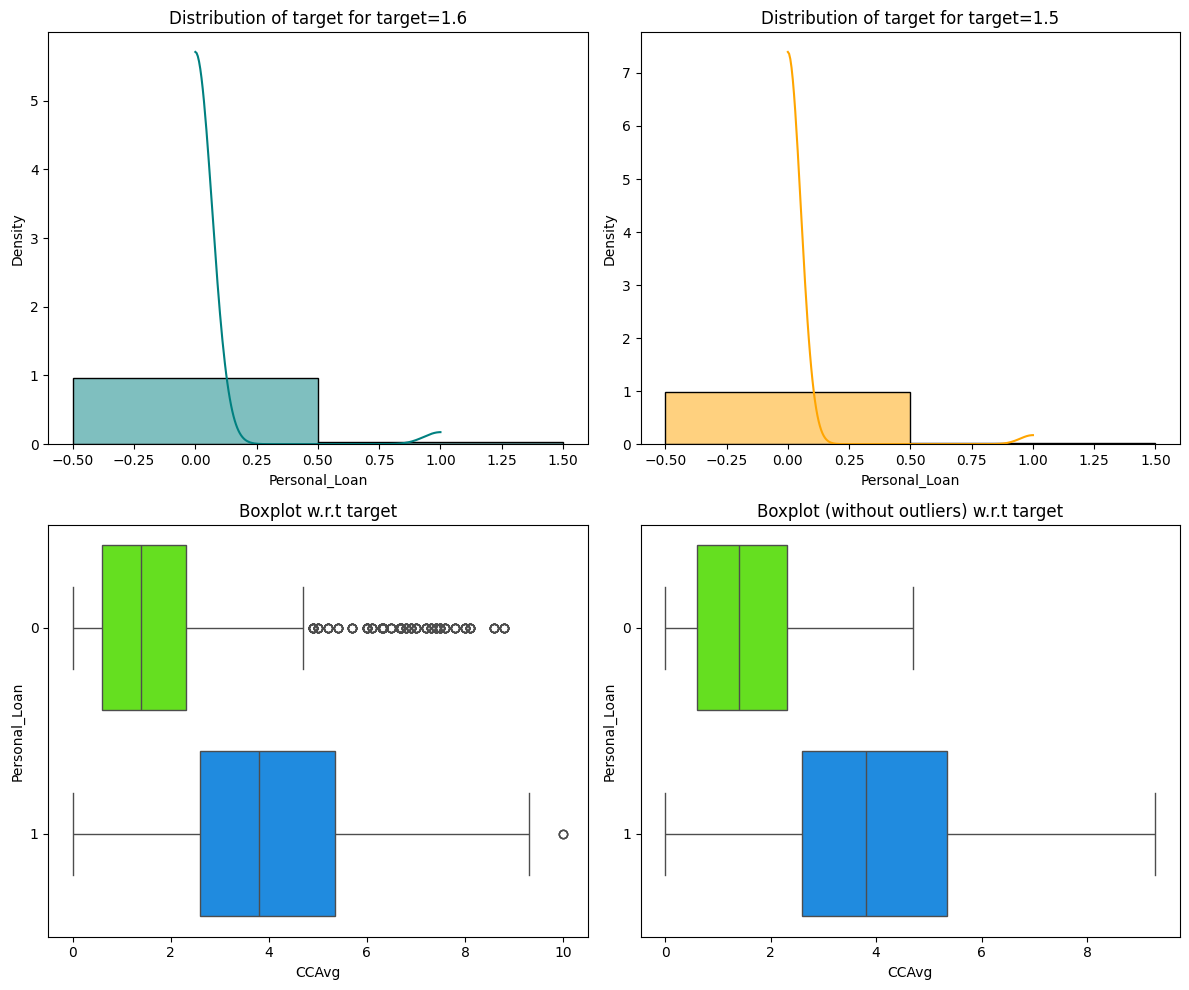

In [ ]:
distribution_plot_wrt_target(data, 'Personal_Loan', 'CCAvg') ## Complete the code to plot stacked barplot for Personal Loan and CCAvg

## Data Preprocessing (contd.)

### Outlier Detection

This code calculates the interquartile range (IQR) and uses it to define lower and upper bounds for identifying potential outliers in numerical data. It first finds the 25th percentile (Q1) and 75th percentile (Q3) of the data, then calculates the IQR as the difference between Q3 and Q1. Finally, it establishes lower and upper bounds by subtracting and adding 1.5 times the IQR to Q1 and Q3, respectively. Any data points falling outside these bounds can be considered potential outliers.

In [ ]:
def check_outliers(data):
    """
    Check for outliers using the IQR method
    data: dataframe
    columns: list of columns to check for outliers
    """
    Q1 = data.select_dtypes(include=['int64', 'float64']).quantile(0.25) # To find the 25th percentile and 75th percentile
    Q2 = data.select_dtypes(include=['int64', 'float64']).quantile(0.75)

    IQR = Q2 - Q1  #Inter Quantile Range (75th percentile - 25th percentile)

    lower = (Q1 - 1.5 * IQR)

    upper = (Q2 + 1.5 * IQR)

    #find lower and upper bounds for all values. All values outside these bounds are outliers
    outliers =  (
        (data.select_dtypes(include=['int64', 'float64']) < lower) |
          (data.select_dtypes(include=['int64', 'float64']) > upper)
    ).sum() / len(data) * 100

    return outliers

In [ ]:
check_outliers(data)

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


In [ ]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


In [ ]:
#Quantile
upper

,0
Age,85.0
Experience,60.0
Income,186.5
Family,6.0
CCAvg,5.2
Mortgage,252.5


### Data Preparation for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- *mention the model evaluation criterion here with proper reasoning*

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (sklearn default)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 5, 8],
    "min_samples_leaf": [5, 10, 25]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}
Best Score: 0.987142857142857


In [ ]:
# RandomSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [ ]:
# Step 3: Instantiate RandomizedSearchCV with the model and parameters
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring='accuracy',
    n_iter=20,  # Number of parameter settings sampled
    cv=5,       # Cross-validation folds
    n_jobs=-1,  # Use all available processors
    verbose=1,
    random_state=42
)

In [ ]:
# Fit the model with training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Test the best model on the test data
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}
Best Score: 0.988857142857143
Test Accuracy: 0.9793333333333333


#### Checking model performance on training data

Understanding the Confusion Matrix:

A confusion matrix is a table that visualizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.

nalysis of the Provided Matrix:

Labels:
"True label" represents the actual class.
"Predicted label" represents the model's prediction.
0 and 1 represent the two classes (likely 0 = No, 1 = Yes for a binary classification problem).
Counts and Percentages:
Top Left (TN): 3169 (90.54%) - The model correctly predicted 3169 instances as class 0.
Top Right (FP): 0 (0.00%) - The model incorrectly predicted 0 instances as class 1 when they were actually class 0.
Bottom Left (FN): 0 (0.00%) - The model incorrectly predicted 0 instances as class 0 when they were actually class 1.
Bottom Right (TP): 331 (9.46%) - The model correctly predicted 331 instances as class 1.
Color Scale:
The color bar on the right indicates the count of instances, with darker colors representing lower counts and lighter colors representing higher counts.

Absolutely! Let's analyze the provided confusion matrix:

Understanding the Confusion Matrix:

A confusion matrix is a table that visualizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives. 1
 1.
cheatography.com
cheatography.com

True Positives (TP): Predicted 1, Actual 1 (Bottom Right)
True Negatives (TN): Predicted 0, Actual 0 (Top Left)
False Positives (FP): Predicted 1, Actual 0 (Top Right)
False Negatives (FN): Predicted 0, Actual 1 (Bottom Left)
Analysis of the Provided Matrix:

Labels:
"True label" represents the actual class.
"Predicted label" represents the model's prediction.
0 and 1 represent the two classes (likely 0 = No, 1 = Yes for a binary classification problem).
Counts and Percentages:
Top Left (TN): 3169 (90.54%) - The model correctly predicted 3169 instances as class 0.
Top Right (FP): 0 (0.00%) - The model incorrectly predicted 0 instances as class 1 when they were actually class 0.
Bottom Left (FN): 0 (0.00%) - The model incorrectly predicted 0 instances as class 0 when they were actually class 1.
Bottom Right (TP): 331 (9.46%) - The model correctly predicted 331 instances as class 1.
Color Scale:
The color bar on the right indicates the count of instances, with darker colors representing lower counts and lighter colors representing higher counts.


Observations:

Perfect Classification:
This confusion matrix indicates perfect classification. There are no false positives (FP) and no false negatives (FN). This means the model made no errors in its predictions.
Imbalance:
The data is imbalanced, with a much larger number of instances belonging to class 0 (3169) compared to class 1 (331).
High Accuracy:
The overall accuracy of the model is 100% because all predictions are correct.
Implications:

Ideal Scenario: This matrix represents an ideal scenario where the model is perfectly accurate.
Potential Overfitting: In real-world scenarios, such perfect results are rare and might indicate overfitting. The model might have memorized the training data instead of learning generalizable patterns.
Data Leakage: It is also possible that there was data leakage during the model creation process. Data leakage is when information from the target variable is used to train the model, which leads to overly optimistic results.

Absolutely! Let's analyze the provided confusion matrix:

Understanding the Confusion Matrix:

A confusion matrix is a table that visualizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives. 1
 1.
cheatography.com
cheatography.com

True Positives (TP): Predicted 1, Actual 1 (Bottom Right)
True Negatives (TN): Predicted 0, Actual 0 (Top Left)
False Positives (FP): Predicted 1, Actual 0 (Top Right)
False Negatives (FN): Predicted 0, Actual 1 (Bottom Left)
Analysis of the Provided Matrix:

Labels:
"True label" represents the actual class.
"Predicted label" represents the model's prediction.
0 and 1 represent the two classes (likely 0 = No, 1 = Yes for a binary classification problem).
Counts and Percentages:
Top Left (TN): 3169 (90.54%) - The model correctly predicted 3169 instances as class 0.
Top Right (FP): 0 (0.00%) - The model incorrectly predicted 0 instances as class 1 when they were actually class 0.
Bottom Left (FN): 0 (0.00%) - The model incorrectly predicted 0 instances as class 0 when they were actually class 1.
Bottom Right (TP): 331 (9.46%) - The model correctly predicted 331 instances as class 1.
Color Scale:
The color bar on the right indicates the count of instances, with darker colors representing lower counts and lighter colors representing higher counts.
Observations:

Perfect Classification:
This confusion matrix indicates perfect classification. There are no false positives (FP) and no false negatives (FN). This means the model made no errors in its predictions.
Imbalance:
The data is imbalanced, with a much larger number of instances belonging to class 0 (3169) compared to class 1 (331).
High Accuracy:
The overall accuracy of the model is 100% because all predictions are correct.
Implications:

Ideal Scenario: This matrix represents an ideal scenario where the model is perfectly accurate.
Potential Overfitting: In real-world scenarios, such perfect results are rare and might indicate overfitting. The model might have memorized the training data instead of learning generalizable patterns.
Data Leakage: It is also possible that there was data leakage during the model creation process. Data leakage is when information from the target variable is used to train the model, which leads to overly optimistic results.


In Summary:

The confusion matrix shows a perfect classification with 100% accuracy. However, such results should be carefully examined for potential overfitting or data leakage issues.

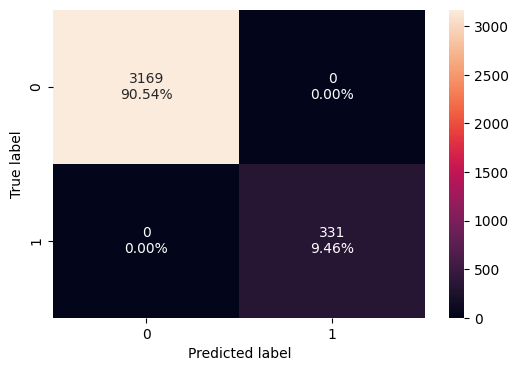

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

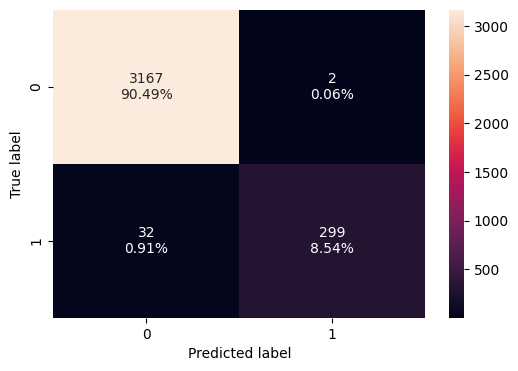

In [ ]:
#best model correlations
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.903323,0.993355,0.946203


#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


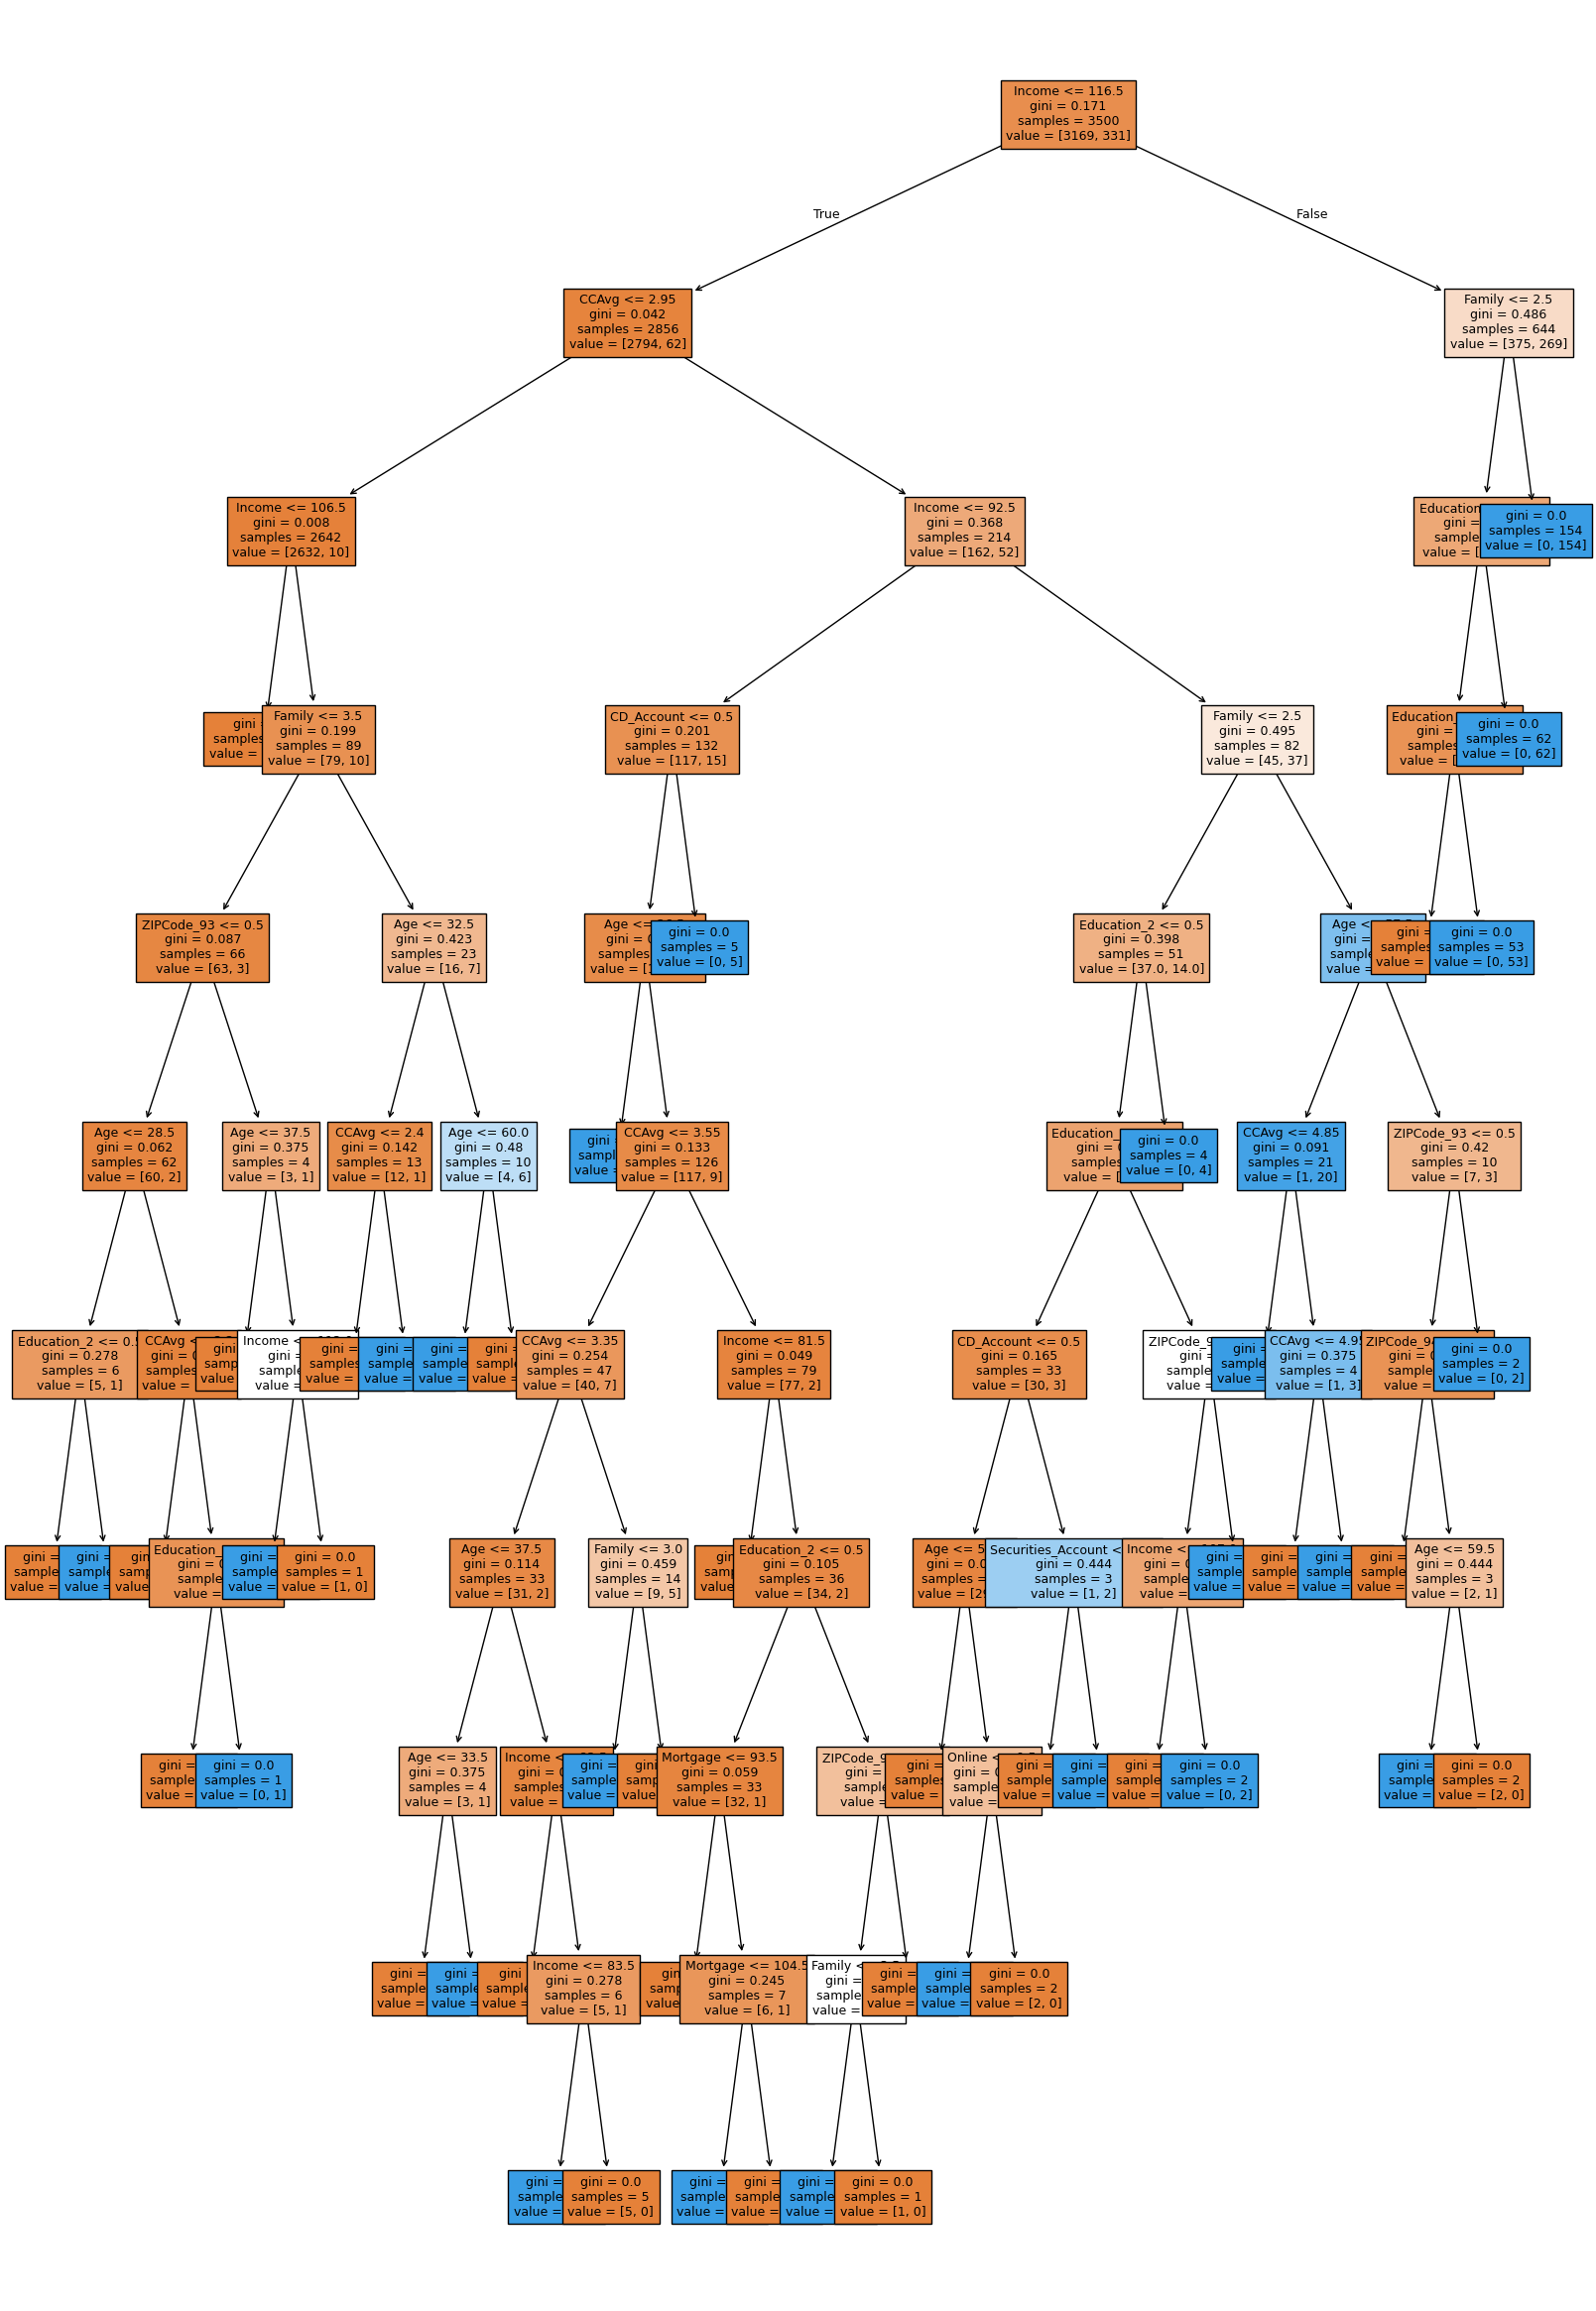

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

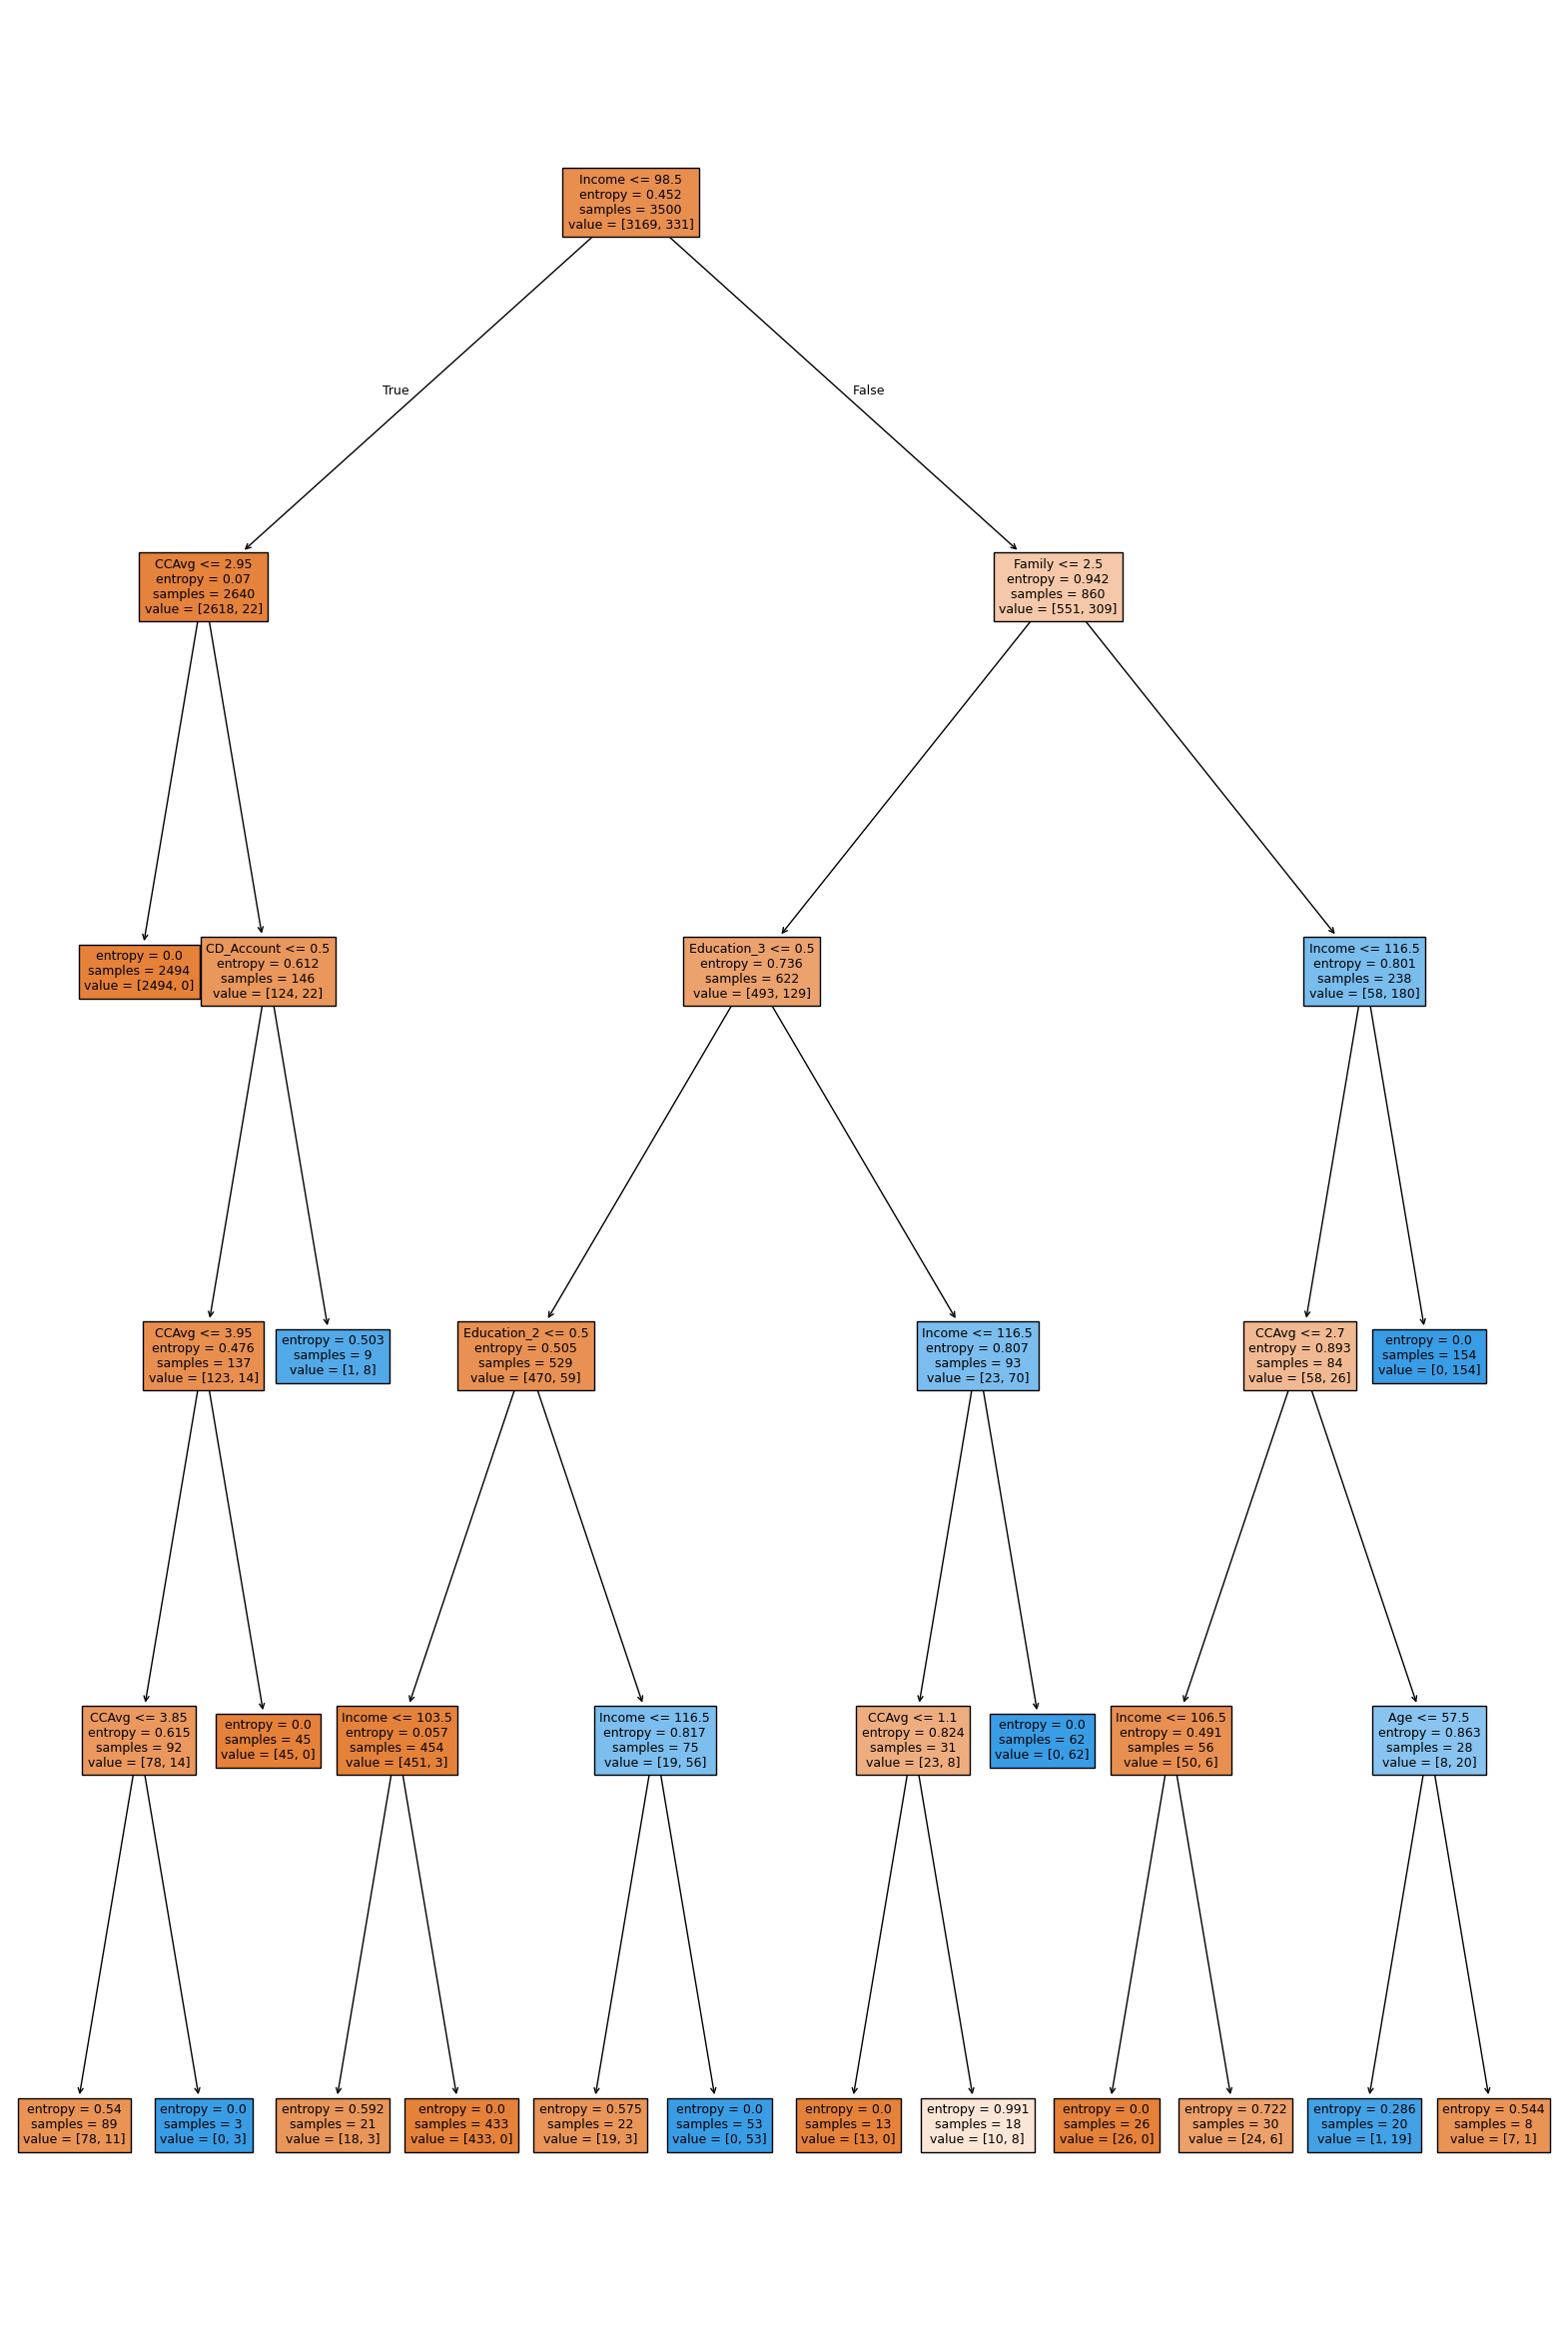

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


In [ ]:
#best model importance feature in tree building
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.564204
Education_2         0.123596
Family              0.111099
CCAvg               0.098022
Education_3         0.079924
CD_Account          0.013459
Age                 0.009696
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


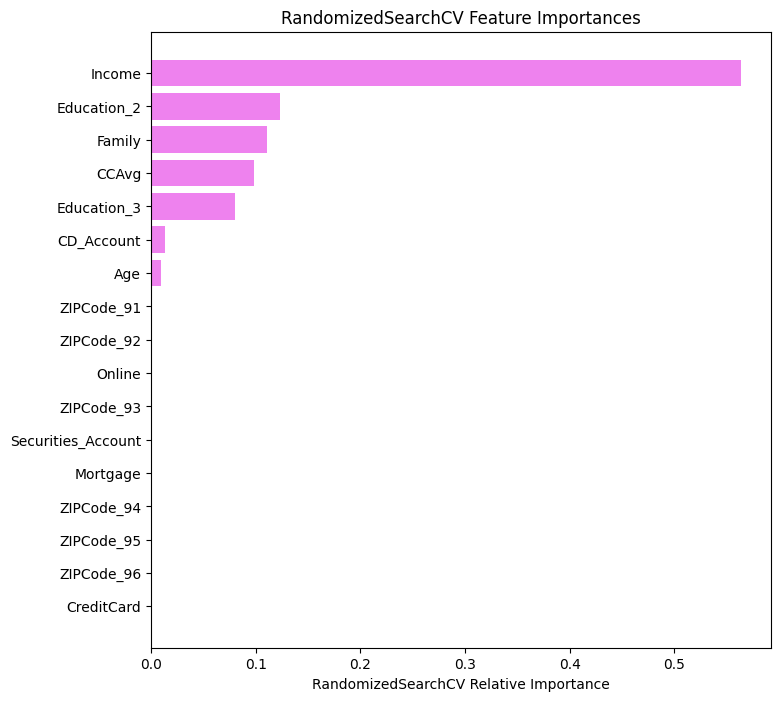

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("RandomizedSearchCV Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("RandomizedSearchCV Relative Importance")
plt.show()

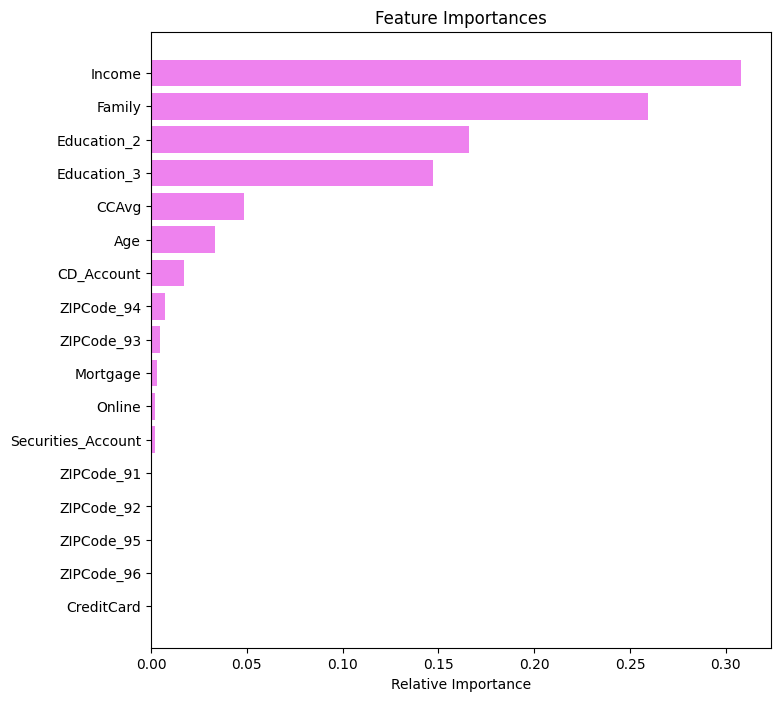

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

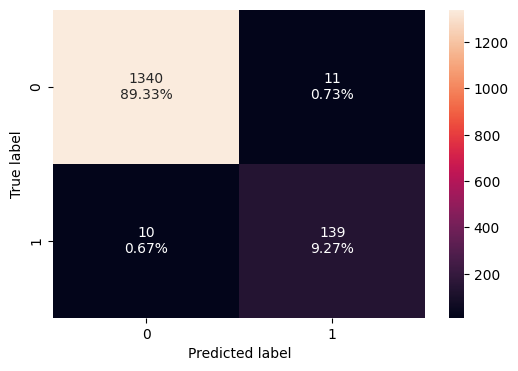

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

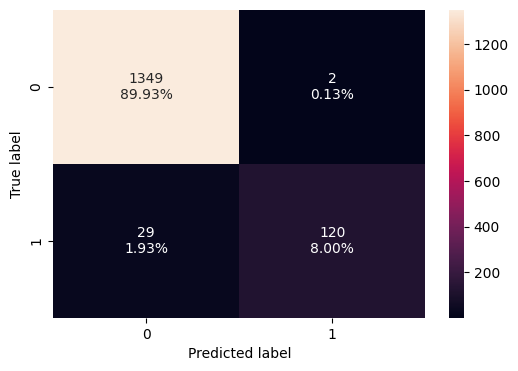

In [ ]:
#confustion matrix with best_model on testing data
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Improvement

#### Pre-pruning

**Note**: The parameters provided below are a sample set. You can feel free to update the same and try out other combinations.

In [ ]:
max_depth_values = np.arange(5, 10, 20)
max_leaf_nodes_values = [2, 8, 16, 32]
min_samples_split_values = [2, 5, 10]


# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                criterion='gini',
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                # max_features = 'log2',
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 5
Max leaf nodes: 8
Min samples split: 2
Best test recall score: 0.959731543624161


In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=8,
                       random_state=42)

**Checking performance on training data**

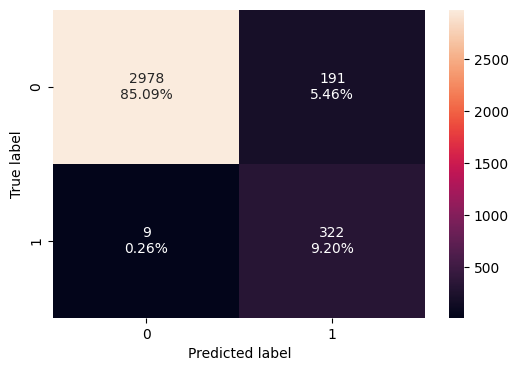

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train ) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.942857,0.97281,0.62768,0.763033


**Visualizing the Decision Tree**

Let's analyze the provided decision tree graph, considering the pruning parameters you've provided:

Understanding the Tree:

Root Node:
"Income <= 92.5": The initial split is based on income.
gini = 0.5: This indicates maximum impurity, meaning the classes are evenly mixed at the start.
samples = 3500: The total number of data points.
value = [1750.0, 1750.0]: An even distribution of the two classes.
Left Branch (True):
"CCAvg <= 2.95": Further split based on credit card average spending.
gini = 0.101: Impurity is reduced, indicating better separation.
samples = 2567: Number of samples following this branch.
value = [1409.277, 79.305]: Shows the class distribution.
Left most leaf node gini = -0.0, this indicate a pure node.
Right Branch (False):
"Family <= 2.5": Split based on family size.
gini = 0.281: Reduced impurity, but not as much as the left branch.
samples = 933: Number of samples following this branch.
value = [340.723, 1670.695]: Class distribution.
Right most leaf node gini = 0.08, this node is fairly pure.
Analysis Based on Pruning Parameters:

max_depth_values = np.arange(2, 7, 2):
This means the model tested maximum depths of 2, 4, and 6.
The tree shown has a depth of 2, indicating that a max_depth of 2 was sufficient or optimal after pruning.
max_leaf_nodes_values = [50, 75, 150, 250]:
This means the model tested different maximum numbers of leaf nodes.
The tree has 4 leaf nodes. Given the small size of the tree, it is hard to tell which max_leaf_nodes_values was the one chosen.
min_samples_split_values = [10, 30, 50, 70]:
This means the model tested different minimum samples required to split an internal node.
The splits in the tree have a significant number of samples, so the pruning parameters are meet.
Balanced Weights:
The balance weight, helps the model to account for the imbalance of the data. The root node having a gini score of 0.5, indicate that the dataset was very balanced at the start.
Observations:

Key Features: The tree highlights "Income," "CCAvg," and "Family" as important features.
Depth: The tree's depth of 2 suggests that simpler models were favored during pruning.
Impurity: The Gini impurity decreases as you move down the tree, indicating that the splits are effective in separating the classes.
Pruning Impact: The pruning parameters have likely prevented the tree from growing too complex, which is beneficial for generalization.
Summary:

The decision tree graph illustrates a pruned model that effectively uses "Income," "CCAvg," and "Family" as key features. The pruning parameters have successfully controlled the tree's complexity, resulting in a relatively simple and interpretable model. The balance weight parameter, help the model to account for the dataset being balanced.

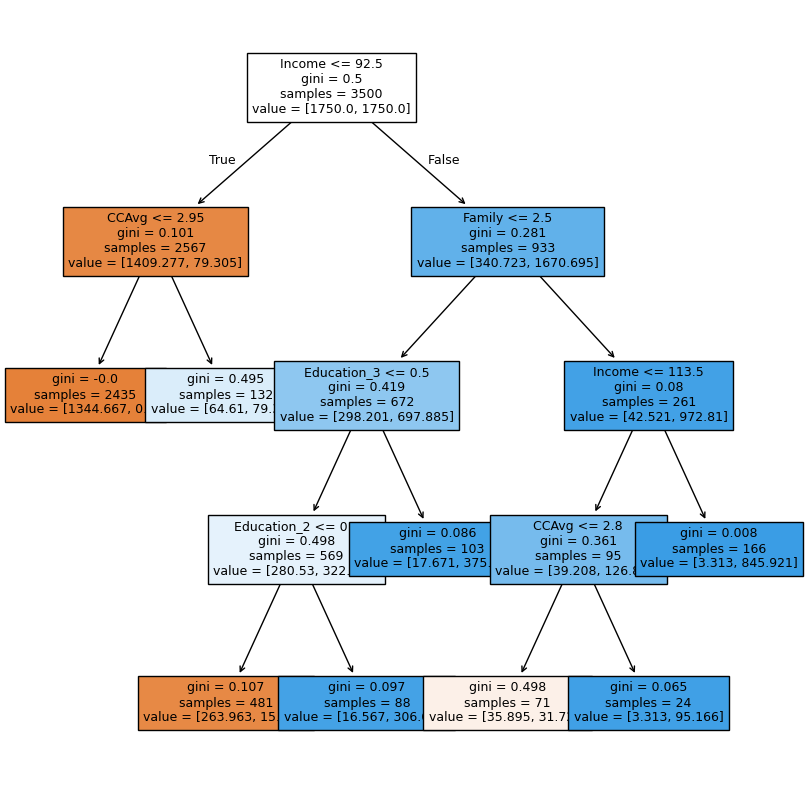

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [16.57, 306.65] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [17.67, 375.38] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [35.89, 31.72] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [3.31, 95.17] class: 1
|   |   |--- Income >  113.50
|   |   |   |--- weights: [3.31, 845.92] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.682372
Education_2         0.155302
CCAvg               0.064265
Education_3         0.054681
Family              0.043380
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
Age                 0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


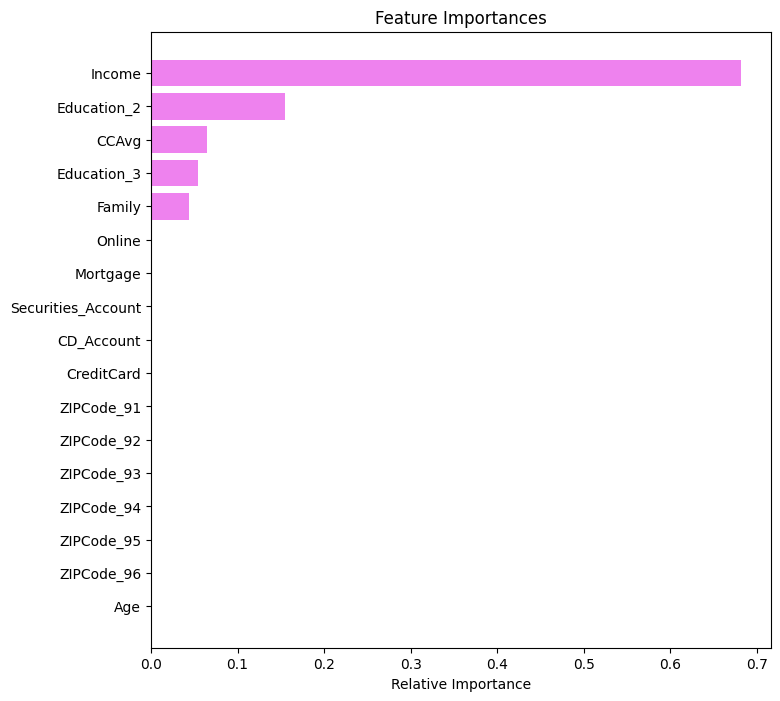

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

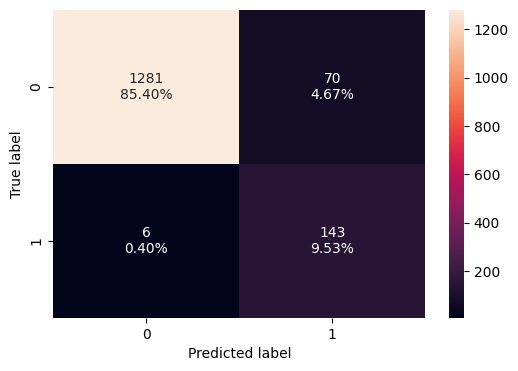

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.949333,0.959732,0.671362,0.790055


#### Post-pruning

In [ ]:
#Create instance of model
clf = DecisionTreeClassifier(random_state=1)

#compute cost complexity purning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

#extra the arraay of alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


Observations:

Inverse Relationship: There is a general inverse relationship between "effective alpha" and "total impurity." As alpha increases, the total impurity tends to increase as well.
Steps/Plateaus: The graph shows distinct steps or plateaus. This is characteristic of cost-complexity pruning. Each step corresponds to a point where a branch of the tree is pruned, resulting in a jump in total impurity.
Low Alpha, Low Impurity: At very low alpha values (close to 0), the total impurity is also very low. This indicates that the tree is complex and fits the training data very well.
Sharp Increase in Impurity: There are a few points where the impurity increases sharply with a small increase in alpha. This means that even a small amount of pruning can have a significant impact on the tree's impurity.
High Alpha, High Impurity: At high alpha values, the total impurity is also high. This indicates that the tree is heavily pruned and no longer fits the training data as well.
Optimal Alpha: The "elbow" or point where the impurity starts to increase significantly indicates a good balance between tree complexity and fit. In this graph, there is not a clear elbow, and the graph shows a few jumps in the impurity.
Interpretations:

Pruning Effect: The graph illustrates the effect of cost-complexity pruning on the decision tree's impurity. As alpha increases, the tree becomes simpler, leading to higher impurity.
Finding the Right Alpha: The goal of cost-complexity pruning is to find an alpha value that minimizes impurity while preventing overfitting. This graph helps in visualizing how different alpha values affect the tree's performance on the training data.
Choosing a Model: This graph helps to choose a model that is neither too complex, which would cause overfitting, nor too simple, which would cause underfitting.
Summary:

This plot demonstrates the impact of cost-complexity pruning on the training set's total impurity. As the pruning strength (alpha) increases, the tree's complexity decreases, resulting in higher impurity. The steps in the graph show the points at which branches are pruned. By analyzing this graph, you can choose an appropriate alpha value that balances the tree's complexity and its fit to the training data.

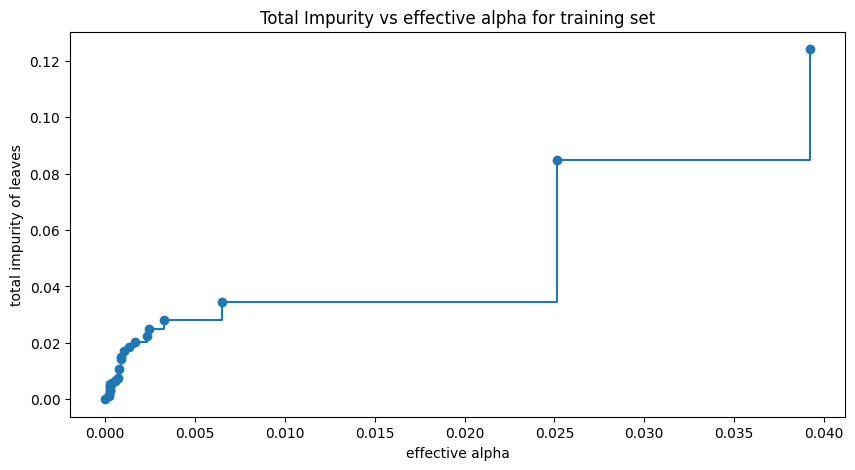

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


Let's analyze the two plots in the image: "Number of nodes vs alpha" and "Depth vs alpha" in the context of cost-complexity pruning (CCP) for decision trees.

Top Plot: Number of Nodes vs. Alpha

Type: Line plot with markers.
X-axis: "alpha" (CCP alpha) - Represents the cost-complexity pruning parameter. Higher alpha means more aggressive pruning.
Y-axis: "Number of nodes" - Shows the number of nodes in the decision tree.
Observations:
Inverse Relationship: There's a clear inverse relationship between alpha and the number of nodes. As alpha increases, the number of nodes decreases significantly.
Rapid Decrease: At very low alpha values (close to 0), the number of nodes is high, indicating a complex tree. As alpha slightly increases, there's a rapid drop in the number of nodes.
Plateaus: The graph shows plateaus, indicating that certain ranges of alpha result in the same number of nodes. This is due to the discrete nature of tree pruning.
Minimal Nodes at High Alpha: At higher alpha values, the number of nodes is very low, indicating a heavily pruned, simple tree.
Bottom Plot: Depth vs. Alpha

Type: Line plot with markers.
X-axis: "alpha" (CCP alpha) - Same as the top plot.
Y-axis: "Depth of tree" - Shows the maximum depth of the decision tree.
Observations:
Inverse Relationship: Similar to the top plot, there's an inverse relationship between alpha and the depth of the tree. As alpha increases, the depth decreases.
Stepped Reduction: The depth decreases in steps, indicating that pruning removes entire levels of the tree at certain alpha thresholds.
Shallow Tree at High Alpha: At higher alpha values, the depth is very low, indicating a very shallow, simple tree.
High Depth at low Alpha: At low Alpha values the depth of the tree is at its highest.
Combined Interpretation:

Pruning Effect: Both plots clearly demonstrate the effect of cost-complexity pruning. As alpha increases, the tree becomes simpler, with fewer nodes and lower depth.
Controlling Complexity: These plots are crucial for selecting the optimal alpha value. You want to choose an alpha that balances tree complexity and performance.
Overfitting vs. Underfitting:
A very low alpha results in a complex tree (high number of nodes and depth), which may overfit the training data.
A very high alpha results in a simple tree (low number of nodes and depth), which may underfit the data.
Choosing the right alpha: The plots show that there are drastic changes in the tree structure with very small changes in the alpha value, at the lower end of the alpha scale.
Summary:

These plots visualize the impact of the cost-complexity pruning parameter (alpha) on the structure of a decision tree. They help in understanding how alpha controls the tree's complexity and aid in selecting an appropriate alpha value to balance overfitting and underfitting.

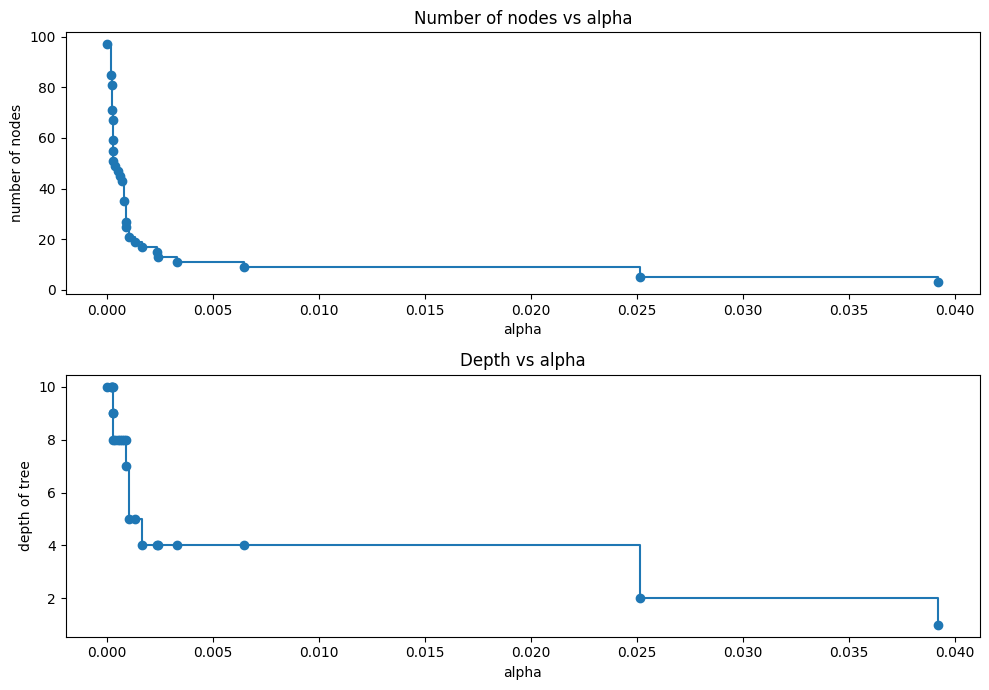

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

Let's analyze the provided plot of "Recall vs alpha for training and testing sets":

Type of Graph:

This is a line plot with markers, showing the relationship between "alpha" (CCP alpha) and "Recall" for both the training and testing sets.
Data Represented:

X-axis: "alpha" - Represents the cost-complexity pruning (CCP) parameter. Higher alpha means more aggressive pruning.
Y-axis: "Recall" - Shows the recall score, a metric that measures the model's ability to correctly identify all positive instances.
Two Lines:
Blue line with circles: Represents the recall score for the training set.
Orange line with circles: Represents the recall score for the testing set.
Observations:

Training Recall Decline: The training recall starts high (close to 1.0) at low alpha values and decreases as alpha increases. This is expected, as pruning reduces the model's ability to perfectly fit the training data.
Testing Recall Trend: The testing recall shows a more complex pattern:
It starts relatively high at low alpha values.
It experiences a small dip at slightly higher alpha values.
It plateaus for a while.
Then it sharply drops at a higher alpha value.
Overfitting at Low Alpha: At very low alpha values (close to 0), the training recall is significantly higher than the testing recall. This indicates overfitting, where the model performs very well on the training data but poorly on the unseen test data.
Optimal Alpha Range: There's a range of alpha values where the testing recall is relatively stable and close to the training recall. This suggests that the model is generalizing well in this range.
Underfitting at High Alpha: At higher alpha values, both the training and testing recall drop significantly. This indicates underfitting, where the model is too simple to capture the underlying patterns in the data.
Sharp Drop at 0.025: There is a sharp drop in both the training and testing recall at an alpha value of approximately 0.025. This indicates a significant pruning event that greatly impacts the model's performance.
Interpretations:

Balancing Complexity and Generalization: The plot helps in finding an alpha value that balances model complexity and generalization. You want to choose an alpha where the testing recall is high and close to the training recall, without being too low.
Identifying Optimal Alpha: The "elbow" or point where the testing recall starts to decline sharply indicates the optimal alpha value. In this case, it appears to be somewhere before 0.025.
Impact of Pruning: The plot illustrates the impact of cost-complexity pruning on the recall score. As alpha increases, the model's ability to correctly identify positive instances changes, with potential for both overfitting and underfitting.
Summary:

This plot demonstrates the impact of the cost-complexity pruning parameter (alpha) on the recall score for both the training and testing sets. By analyzing the plot, you can identify an optimal alpha value that balances model complexity and generalization performance. The plot also highlights the risks of overfitting at low alpha values and underfitting at high alpha values. The sharp drop at 0.025 indicates a critical pruning event that should be considered when choosing the final model.

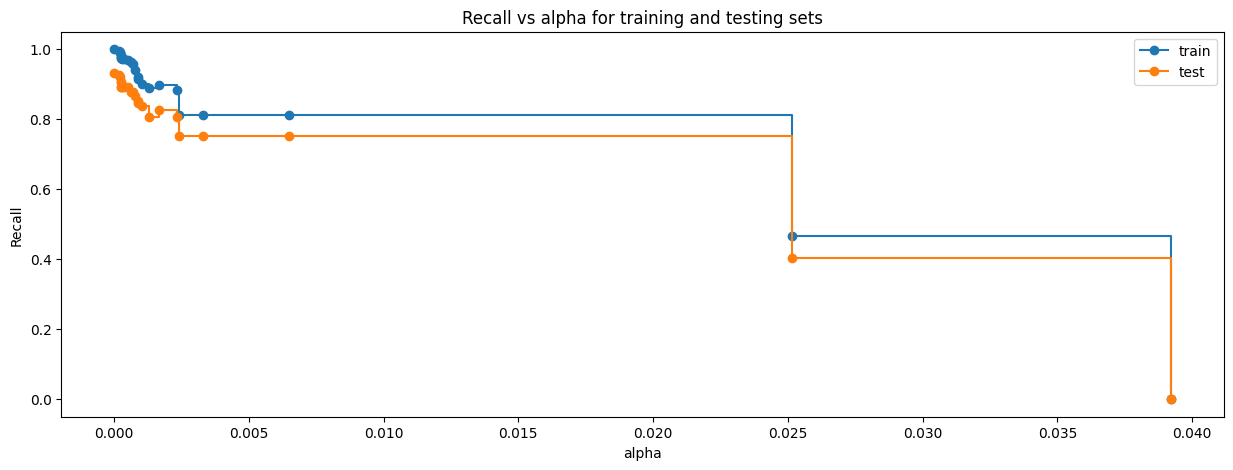

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.015, 1: 0.025}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.015, 1: 0.025}, random_state=1)

**Checking performance on training data**

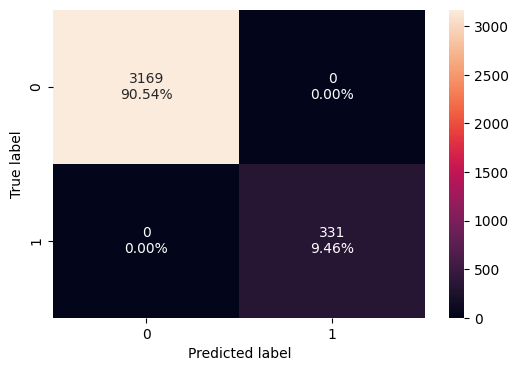

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Visualizing the Decision Tree**

Let's analyze the provided decision tree graph:

Graph Description:

Type: A simple decision tree graph with one split.
Root Node:
Condition: "Income <= 106.5" - This is the decision rule at the root node. If a customer's income is less than or equal to 106.5, they go down the "True" branch; otherwise, they go down the "False" branch.
Gini Impurity: "gini = 0.253" - This indicates the impurity of the root node before the split. A higher Gini impurity means the node is more mixed in terms of class labels.
Samples: "samples = 3500" - This is the total number of samples (customers) at the root node.
Value: "value = [47.535, 8.275]" - This represents the distribution of classes at the root node. It likely means there are 47.535 samples of one class and 8.275 of another.
Left (True) Node:
Gini Impurity: "gini = 0.044" - This is the impurity after the split for the "True" branch. The impurity is much lower, indicating a more pure node.
Samples: "samples = 2730" - This is the number of samples that satisfy the "Income <= 106.5" condition.
Value: "value = [40.395, 0.925]" - This represents the class distribution for this node.
Right (False) Node:
Gini Impurity: "gini = 0.5" - This is the impurity after the split for the "False" branch. It's relatively high, indicating a mixed node.
Samples: "samples = 770" - This is the number of samples that do not satisfy the "Income <= 106.5" condition.
Value: "value = [7.14, 7.35]" - This represents the class distribution for this node.
Analysis:

Income as a Splitter: The decision tree uses "Income" as the primary feature for splitting the data. This means that income is a significant factor in distinguishing between the two classes.
Impurity Reduction: The split significantly reduces the Gini impurity in the left (True) node, indicating that the split is effective in separating the classes for customers with incomes less than or equal to 106.5.
Mixed Right Node: The right (False) node has a high Gini impurity, suggesting that the split is less effective for customers with incomes greater than 106.5.
Imbalance: The number of samples in the left node (2730) is much higher than in the right node (770), indicating an imbalance in the data after the split.
Cost Complexity Alpha:

The Gini impurity of 0.253 is not the cost complexity alpha.
The cost complexity alpha (CCP alpha) is a parameter used to control the pruning of a decision tree. It's used during the pruning process to determine which branches to remove based on a trade-off between the tree's complexity and its error.
In this simple graph we are seeing the results of one split in the tree. To determine the ccp_alpha you would have to look at the process used to create the tree.
The Gini impurity is a measure of node impurity, while the CCP alpha is a pruning parameter.
Summary:

The decision tree graph shows a simple split based on "Income," effectively separating a portion of the data with low impurity. However, the right node remains mixed, and the data is imbalanced. The Gini impurity is a measure of node impurity, and it is not the same as the cost complexity alpha.

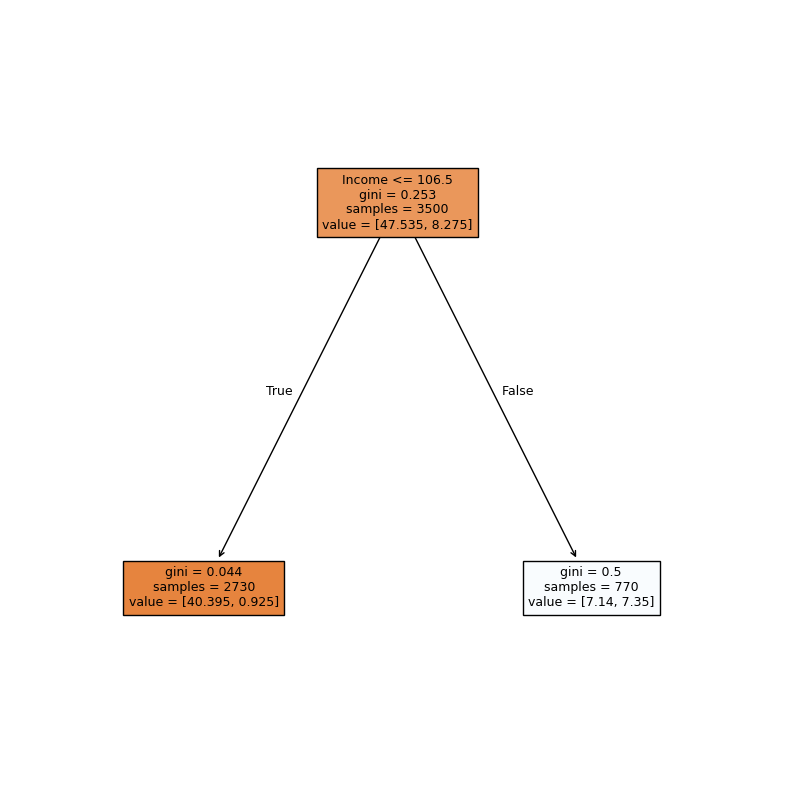

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 106.50
|   |--- weights: [40.40, 0.93] class: 0
|--- Income >  106.50
|   |--- weights: [7.14, 7.35] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
ZIPCode_91          0.0
Education_2         0.0
ZIPCode_96          0.0
ZIPCode_95          0.0
ZIPCode_94          0.0
ZIPCode_93          0.0
ZIPCode_92          0.0
CreditCard          0.0
Online              0.0
CD_Account          0.0
Securities_Account  0.0
Mortgage            0.0
CCAvg               0.0
Family              0.0
Education_3         0.0


et's analyze the feature importance graph for the post-pruned decision tree:

Type of Graph:

Horizontal Bar Chart showing feature importance.
Data Represented:

Y-axis: Features (variables) from the post-pruned decision tree model.
X-axis: "Relative Importance," indicating the contribution of each feature to the model's predictions.
Observations:

Dominant Feature:
Income: The "Income" feature is overwhelmingly the most important feature in the post-pruned model. Its relative importance is extremely high, close to 1.0.
Negligible Importance:
All other features have virtually no importance. The bars for these features are extremely short, practically invisible on the graph.
Features like "Education_3," "Online," "Family," "CCAvg," "Mortgage," "Securities_Account," "CD_Account," "CreditCard," "Education_2," all ZIP code prefixes, and "Age" have almost no impact on the model's predictions.
Interpretations:

Extreme Simplification: The post-pruning process has resulted in a highly simplified model that relies almost exclusively on the "Income" feature.
Focus on Income: The model's predictions are essentially determined solely by the "Income" variable.
Potential Over-Pruning: The extreme dominance of "Income" suggests that the tree may have been over-pruned. The model may have lost the ability to capture other potentially relevant patterns in the data.
Possible Data Issues: The strong dominance of a single feature might also indicate potential issues with the data or model, such as:
Data Leakage: Information from the target variable might be inadvertently present in the "Income" feature.
Overfitting to Income During Training: The model might have been overfitting to the "Income" feature during training, and the pruning process simply removed the other branches.
Feature Engineering Issues: Other features might not be properly engineered or represented in the data, making them less informative.
Summary:

The feature importance graph for the post-pruned decision tree reveals that "Income" is the sole determinant of the model's predictions. The pruning process has resulted in a highly simplified model that ignores all other features. This suggests that the tree may have been over-pruned, and further investigation into potential data or model issues is warranted. The model's performance should be carefully evaluated to ensure it is not underfitting or suffering from data leakage.

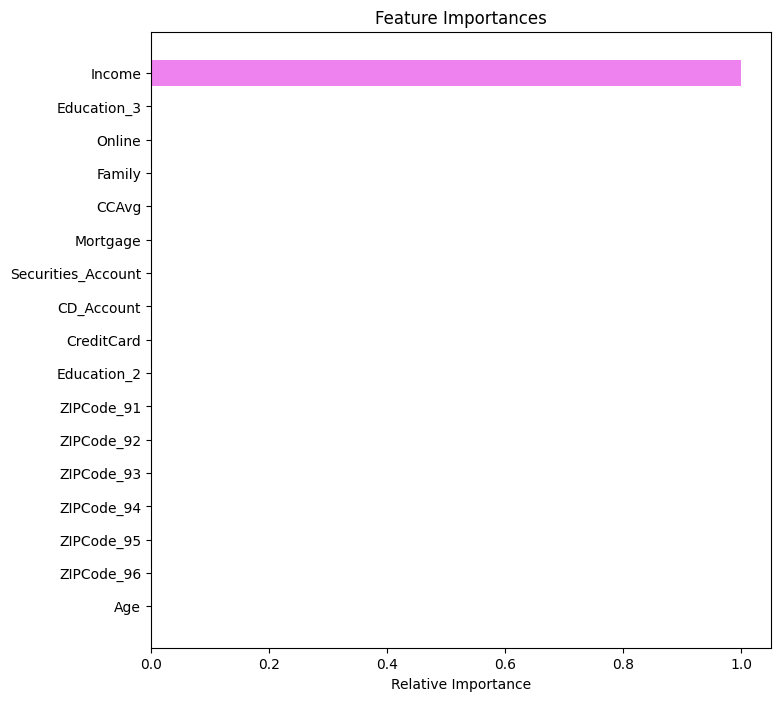

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

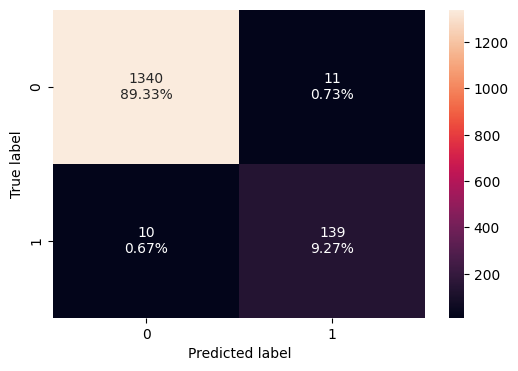

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


In [ ]:
decision_tree_random_search_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_random_search_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Comparison and Final Model Selection

Based on the provided table of test set performance metrics for three different decision tree models (sklearn default, pre-pruning, and post-pruning), here's a model evaluation criterion:

Model Evaluation Criterion

Given that all three models exhibit identical performance across all the listed metrics (accuracy, recall, precision, and F1-score), the optimal model selection should prioritize simplicity and interpretability.

Rationale

Identical Performance: Since the models demonstrate no differences in their predictive capabilities on the test set, there is no advantage in terms of accuracy, recall, precision, or F1-score to favor one model over another.
Simplicity and Interpretability: In this scenario, where predictive performance is equivalent, the model's complexity becomes a crucial factor. Simpler models (e.g., a less deep tree with fewer nodes) are generally easier to interpret and understand. This interpretability is valuable for explaining the model's decisions and gaining insights into the underlying relationships in the data.
Potential for Overfitting: More complex models have a higher risk of overfitting the training data, even if they perform similarly on the test set. A simpler model might generalize better to new, unseen data.
Recommendation

Based on this criterion, the post-pruned decision tree is likely the most suitable choice. Post-pruning techniques aim to reduce complexity and improve generalization by removing unnecessary branches from the tree.

Additional Considerations

Computational Resources: If computational resources are a concern, the simpler model would be more efficient to train and deploy.
Specific Requirements: If there are specific requirements for interpretability or explainability, the simpler model would be more suitable.
Further Analysis: If a more nuanced comparison is needed, additional metrics (e.g., ROC AUC, PR AUC) or techniques (e.g., visualization of decision boundaries) could be explored.
Conclusion

When multiple models exhibit identical performance on standard metrics, prioritizing simplicity and interpretability is a sound model evaluation criterion. In this case, the post-pruned decision tree is likely the optimal choice due to its reduced complexity while maintaining equivalent predictive performance.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.990286,0.942857,1.0
Recall,0.903323,0.972810,1.0
Precision,0.993355,0.627680,1.0
F1,0.946203,0.763033,1.0


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.949333,0.986000
Recall,0.932886,0.959732,0.932886
Precision,0.926667,0.671362,0.926667
F1,0.929766,0.790055,0.929766


## Actionable Insights and Business Recommendations

**What recommedations would you suggest to the bank?**

___